<h1>Análise de indicadores macroeconônmicos: Selic e IPCA</h1> 
Autor: <a href=https://www.linkedin.com/in/mailson-p-92909928a/> Mailson Vieira Passos <a/>

<hr>

<h2>Conteúdo</h2>
<div class="alert alert-block alert-danger" style="background-color: #ffffee; margin-top: 20px; margin-left: 10px; color: black; font-size: 15px">
    <ol>
        <li><a href="#Motivacao">Motivação</a></li>
        <li><a href="#Objetivo">Objetivo</a></li>
        <li><a href="#Requisitos">Requisitos</a></li>
        <li><a href="#ColetaTransf">Coletando e transformando os dados + pré-análise</a></li>
            <ol>
                <a href="#Selic">Selic</a></li>
                <ol>
                    <a href="#SobreSelic">Sobre o dataset: Selic</a></li>
                </ol>
                <a href="#IPCA">IPCA</a></li>
                <ol>
                    <a href="#SobreIPCA">Sobre o dataset: IPCA</a></li>
                </ol>
            </ol>    
        <li><a href="#Analise">Análise dos dados</a></li>
    </ol>

</div>

<hr>
<h2><span id='Motivacao'>Motivação</span></h2>
Muito se fala na mídia sobre inflação e juros e o uso que o Banco Central faz dos juros para controle da inflação. Tenho interesse em entender quão efetivo é o aumento ou diminuição dos juros para controle da inflação, neste caso o IPCA. Para isso vou utilizar a Selic e o IPCA.
</ul>

O que é a Selic?

>A taxa Selic é a taxa básica de juros da economia, que influencia outras taxas de juros do país, como taxas de empréstimos, financiamentos e aplicações financeiras. A definição da taxa Selic é o principal instrumento de política monetária utilizado pelo Banco Central (BC) para controlar a inflação.  
A Selic é a taxa de juros média praticada nas operações compromissadas com títulos públicos federais com prazo de um dia útil. O BC realiza operações no mercado de títulos públicos para que a taxa Selic efetiva esteja em linha com a meta da taxa Selic, que é definida pelo Comitê de Política Monetária (Copom) do BC.  
\
Fonte: <a href = 'https://www.bcb.gov.br/controleinflacao/taxaselic'> <b>Banco Central do Brasil</b> </a>

E o que é o IPCA?


>O Índice Nacional de Preços ao Consumidor Amplo (IPCA) mede a inflação de um conjunto de bens e serviços comercializados no varejo, referentes ao consumo pessoal das famílias, cujo rendimento varia entre 1 e 40 salários mínimos, visando uma cobertura de 90 % das famílias pertencentes as áreas urbanas de abrangência do Sistema Nacional de Índices de Preços ao Consumidor (SNIPC), qualquer que seja a fonte de rendimentos. É calculado a partir dos resultados dos índices regionais, utilizando-se a média aritmética ponderada e cuja a variável de ponderação é o Rendimento Familiar Monetário Disponível, tendo como fonte de informação a Pesquisa de Orçamentos Familiares - POF. Refere-se ao número índice (número de pontos ) das taxas de variações de preços do grupo de bens e serviços.  
\
Fonte: <a href = 'http://www.ipeadata.gov.br/ExibeSerie.aspx?serid=36482&module=M'> <b>IPEA</b> </a>

Em suma, a taxa Selic é taxa básica de juros e ela é a principal ferramenta utilizada para controle de inflação. Já o IPCA é um índice de preços que é usado para monitorar a inflação e é referência para o sistema de metas do Banco Central do Brasil.

<hr>

<h2><span id='Objetivo'>Objetivo</span></h2>
<ul>
    <li>Coletar dados da Selic no site do <a href=https://www.bcb.gov.br/controleinflacao/historicotaxasjuros>Banco Central do Brasil</a> e IPCA do arquivo disponível em <a href=https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html?=&t=downloads>IBGE</a></li>
    <li>Fazer transformações necessárias</li>
    <li>Entender melhor a dinâmica juros/inflação por meio da análise de dados</li>
    <li>Relacionar ipca e selic e ver se há associação entre elas</li>
</ul>

<hr>
<h2>Requisitos</h2>
O que eu estou usando:

```python
!pip install pandas==2.0.0
!pip install numpy==1.26.1
!pip install matplotlib==3.8.0
!pip install seaborn==0.13.2
!pip install selenium==4.15.2
!pip install plotly==5.17.0
!pip install statsmodels==0.14.2
!pip install scipy==1.11.3
!pip install ipywidgets==8.1.1
!pip install bs4==4.12.2  
!pip install holidays==0.53
```
<hr>

<h2><span id='ColetaTransf'></span>Extração, transformação e pré-análise</h2>

<h3><span id='Selic'></span>1. Selic</h3>
Primeiramente. vamos coletar dados atualizados da Selic por meio de um script. O script usa a biblioteca Selenium, que automatiza o browser para realizar alguma ação. Normalmente o selinium é utilizado para fazer testes, mas aqui estou utilizando para obter dados de uma tabela que é dinâmica.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from selicbcb import retrieve_selic
retrieve_selic?

Signature: retrieve_selic(browser: str | None = None) -> list[list]
Docstring:
Extrai os dados da tabela contida no site do Banco Central do Brasil por meio de um browser headless.

Parameters
----------
browser : str
    Navegador a ser utilizado. Pode ser Chrome ou Firefox. Padrão = Firefox.

Returns
-------
content: list(list)
    Conteúdo da tabela dinâmica.
File:      c:\users\mailson\analise-dados-macroeconomicos\selicbcb.py
Type:      function

In [3]:
#browser: chrome ou firefox
selic_data = retrieve_selic()

In [4]:
selic_cols =[
    'reuniao_num',
    'reuniao_data',
    'reuniao_vies',
    'periodo_vigencia',
    'meta_selic_pctaa',
    'tban_pctam',
    'taxa_selic_pct',
    'taxa_selic_pctaa']
selic_df = pd.DataFrame(
    selic_data,
    index = None,
    columns = selic_cols)
selic_df.head()

reuniao_num reuniao_data reuniao_vies         periodo_vigencia   
0        265ª   18/09/2024          n/a             19/09/2024 -  \
1        264ª   31/07/2024          n/a  01/08/2024 - 18/09/2024   
2        263ª   19/06/2024          n/a  20/06/2024 - 31/07/2024   
3        262ª   08/05/2024          n/a  09/05/2024 - 19/06/2024   
4        261ª   20/03/2024          n/a  21/03/2024 - 08/05/2024   

  meta_selic_pctaa tban_pctam taxa_selic_pct taxa_selic_pctaa  
0            10,75        n/a                                  
1            10,50        n/a           1,38            10,40  
2            10,50        n/a           1,18            10,40  
3            10,50        n/a           1,15            10,40  
4            10,75        n/a           1,33            10,65

Essa é uma forma de obter a tabela atualizada automaticamente. No entanto, como ocorre mudanças na forma como os dados são apresentados no site, eu salvei um arquivo csv no dia 09/10/2024.

In [5]:
selic_data_file = r'dados/selic.csv'

In [6]:
selic_df = pd.read_csv(
    selic_data_file,
    header = None,
    sep = ';',
    encoding='unicode_escape')
selic_cols =[
    'reuniao_num',
    'reuniao_data',
    'reuniao_vies',
    'periodo_vigencia',
    'meta_selic_pctaa',
    'tban_pctam',
    'taxa_selic_pct',
    'taxa_selic_pctaa']
selic_df.columns = selic_cols
selic_df.head()

reuniao_num reuniao_data reuniao_vies         periodo_vigencia   
0        265ª   18/09/2024          NaN             19/09/2024 -  \
1        264ª   31/07/2024          NaN  01/08/2024 - 18/09/2024   
2        263ª   19/06/2024          NaN  20/06/2024 - 31/07/2024   
3        262ª   08/05/2024          NaN  09/05/2024 - 19/06/2024   
4        261ª   20/03/2024          NaN  21/03/2024 - 08/05/2024   

  meta_selic_pctaa tban_pctam taxa_selic_pct taxa_selic_pctaa  
0            10,75        NaN            NaN              NaN  
1            10,50        NaN           1,38            10,40  
2            10,50        NaN           1,18            10,40  
3            10,50        NaN           1,15            10,40  
4            10,75        NaN           1,33            10,65

<h4><span id='SobreSelic'></span>Sobre o dataset: Selic</h4>

<table>
    <thead>
        <tr>
            <th>Variável</th>
            <th>Descrição</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>reuniao_num</th>
            <td>Classificação ordinal da reunião do Copom</td>
        </tr>
        <tr>
            <th>reuniao_data</th>
            <td>Data da reunião</td>
        </tr>
        <tr>
            <th>reuniao_vies</th>
            <td>Indicativo de tendência de mudança da taxa Selic. Essa mudança pode ser feita na meta, na direção do viés, para a taxa Selic a qualquer momento entre as reuniões ordinárias. </td>
        </tr>
        <tr>
            <th>periodo_vigencia</th>
            <td>Período em que a meta selic fica vigente. </td>
        </tr>
        <tr>
            <th>meta_selic_pctaa</th>
            <td>Meta de juros como referência . </td>
        </tr>
        <tr>
            <th>tban_pctam</th>
            <td> Taxa de Assistência do Banco Central: é uma taxa cobrada em empréstimos quando bancos não possuem títulos públicos para oferecer como garantia, ou quando superam os limites de crédito da linha que utiliza a Taxa Básica do banco central. A TBAN foi criada em 28/8/96 e extinta em 4/3/99 </td>
        </tr>
        <tr>
            <th>taxa_selic_pct</th>
            <td>Taxa média ponderada e ajustada dos financiamentos diários apurados no Sistema Especial de Liquidação e de Custódia (Selic) para operações compromissadas de um dia (overnight) lastreadas em títulos públicos federais, acumulada no período. Títulos públicos são títulos emitidos pelo governo federal e são utilizados por ele para se financiar. </td>
        </tr>
        <tr>
            <th>taxa_selic_pctaa</th>
            <td>Taxa selic anualizada com base em 252 dias úteis. </td>
        </tr>
    </tbody>
</table>

Percebemos que temos dois tipos de Selic: a Selic meta e a Selic efetiva (também chamada de over). Enquanto a primeira é calculada e divulgada pelo Comitê de Política Monetária (COPOM), a última é resultado das operações diárias na SELIC, que é um sistema gerido pelo BCB e acessado por instituições financeiras. É importante ressaltar que há uma lei que obriga instituições financeiras a manter uma quantidade mínima de dinheiro em caixa. Caso esse mínimo não seja cumprido, operações de empréstimo entre instituições financeiras são realizadas a fim de que haja o montante mínimo. A taxa usada para calcular os juros das operações é a Selic meta. Esses empréstimos têm duração de 24 horas e por vezes são chamadas de overnight.

Ref:  
<a href= "https://www.youtube.com/watch?v=WBNkhIaY7gc">canal no youtube da Nexo Jornal</a>  
<a href= "https://warren.com.br/magazine/taxa-selic/">página da Warren Magazine</a>  
<a href= "https://www.bcb.gov.br/en/monetarypolicy/selicrate">site do BCB</a>

A coluna periodo_vigencia abrange a data inicial e a data final de vigência. Para melhorar o acesso a essa coluna, vamos criar duas colunas: uma com a data inicial e outra com a data final, mas antes de tudo será necessário corrigir a formatação dessa coluna adicionando um espaço depois do hífen para que a divisão seja feita na string ' - '.

In [7]:
selic_df.at[0, 'periodo_vigencia'] = selic_df.at[0,'periodo_vigencia'] + ' '
selic_df[['vigencia_inicio', 'vigencia_fim']] = selic_df['periodo_vigencia'].str.split(' - ', expand =  True)
selic_df.head()

reuniao_num reuniao_data reuniao_vies         periodo_vigencia   
0        265ª   18/09/2024          NaN            19/09/2024 -   \
1        264ª   31/07/2024          NaN  01/08/2024 - 18/09/2024   
2        263ª   19/06/2024          NaN  20/06/2024 - 31/07/2024   
3        262ª   08/05/2024          NaN  09/05/2024 - 19/06/2024   
4        261ª   20/03/2024          NaN  21/03/2024 - 08/05/2024   

  meta_selic_pctaa tban_pctam taxa_selic_pct taxa_selic_pctaa vigencia_inicio   
0            10,75        NaN            NaN              NaN      19/09/2024  \
1            10,50        NaN           1,38            10,40      01/08/2024   
2            10,50        NaN           1,18            10,40      20/06/2024   
3            10,50        NaN           1,15            10,40      09/05/2024   
4            10,75        NaN           1,33            10,65      21/03/2024   

  vigencia_fim  
0               
1   18/09/2024  
2   31/07/2024  
3   19/06/2024  
4   08/05/2024

Como a coluna periodo_vigencia não será mais necessária, podemos excluí-la.

In [8]:
selic_df = selic_df.drop(['periodo_vigencia'], axis = 1)
selic_df.head()

reuniao_num reuniao_data reuniao_vies meta_selic_pctaa tban_pctam   
0        265ª   18/09/2024          NaN            10,75        NaN  \
1        264ª   31/07/2024          NaN            10,50        NaN   
2        263ª   19/06/2024          NaN            10,50        NaN   
3        262ª   08/05/2024          NaN            10,50        NaN   
4        261ª   20/03/2024          NaN            10,75        NaN   

  taxa_selic_pct taxa_selic_pctaa vigencia_inicio vigencia_fim  
0            NaN              NaN      19/09/2024               
1           1,38            10,40      01/08/2024   18/09/2024  
2           1,18            10,40      20/06/2024   31/07/2024  
3           1,15            10,40      09/05/2024   19/06/2024  
4           1,33            10,65      21/03/2024   08/05/2024

Temos alguns dados faltantes, mas quantos?

In [9]:
selic_df.isnull().sum().sum()

332

332 dados faltantes. Vamos verificar o tipo dos dados.

In [10]:
selic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   reuniao_num       273 non-null    object
 1   reuniao_data      273 non-null    object
 2   reuniao_vies      187 non-null    object
 3   meta_selic_pctaa  273 non-null    object
 4   tban_pctam        29 non-null     object
 5   taxa_selic_pct    272 non-null    object
 6   taxa_selic_pctaa  272 non-null    object
 7   vigencia_inicio   273 non-null    object
 8   vigencia_fim      273 non-null    object
dtypes: object(9)
memory usage: 19.3+ KB


Todas estão com formato object. Devido ao método de extração é possível que todas as colunas possuam strings em sua composição. Vamos verificar.

In [11]:
def dfcols_type(df: pd.DataFrame, filter: bool | None = None) -> dict[str, set]:
    '''Mostra os tipos presentes em cada coluna de um dataframe
    
    Parametros:
    -----
    df: pd.DataFrame
        Dataframe a ser analisado.
    filter: bool, optional
        Caso True, mostra as colunas com mais de um tipo.
        
    Retorna:
    -----
    df_coltype: dict
        Dicionário contendo o nome da coluna e os tipos presentes nessa coluna.
    '''
    df_coltypes = {}
    df_cols = df.columns 

    for col in df_cols:
        coltypes= set(df[col].apply(lambda x: type(x)))

        if filter and len(coltypes) < 2:
            continue
        df_coltypes[col] = coltypes

    return df_coltypes

In [12]:
dfcols_type(selic_df)

{'reuniao_num': {str},
 'reuniao_data': {str},
 'reuniao_vies': {float, str},
 'meta_selic_pctaa': {str},
 'tban_pctam': {float, str},
 'taxa_selic_pct': {float, str},
 'taxa_selic_pctaa': {float, str},
 'vigencia_inicio': {str},
 'vigencia_fim': {str}}

Todas possuem string e algumas contém float devido aos NaNs. Se eu usasse a tabela que eu extraí diretamente do script, todas estariam como string, mas como usei a versão salva no csv, ele identificou automaticamente os valores nulos.

Transformemos, então, os dados de cada coluna para seus respectivos formatos. Para isso, vou fazer da seguinte forma: 


<table>
    <thead>
        <tr>
            <th>Variável</th>
            <th>Tipo</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>reuniao_num</th>
            <td>Manter como string.</td>
        </tr>
        <tr>
            <th>reuniao_data</th>
            <td>Transformar para data.</td>
        </tr>
        <tr>
            <th>reuniao_vies</th>
            <td>Manter como string. </td>
        </tr>
        <tr>
            <th>meta_selic_pctaa</th>
            <td>Transformar para float. </td>
        </tr>
        <tr>
        <th>tban_pctam</th>
            <td>Transformar para float. </td>
        </tr>
        <tr>
            <th>taxa_selic_porcento</th>
            <td>Transformar para float. </td>
        </tr>
        <tr>
            <th>taxa_selic_pctaa</th>
            <td>Transformar para float. </td>
        </tr>
        <tr>
            <th>vigencia_inicio</th>
            <td>Transformar para data. </td>
        </tr>
        <tr>
            <th>vigencia_fim</th>
            <td>Transformar para data. </td>
        </tr>
    </tbody>
</table>


Além disso, vou acrescentar a data de hoje na coluna vigencia_fim e também mudar o sinal de decimal de virgula para ponto, para então fazer as transformações.

In [13]:
selic_cols = selic_df.columns
num_cols = len(selic_cols)

selic_df.at[0, 'vigencia_fim'] = pd.Timestamp.today().strftime('%d/%m/%Y')

for ii in range(1, num_cols):
    if ii in range(3, 7):
        selic_df[selic_cols[ii]] = selic_df[selic_cols[ii]].str.replace(',', '.') 
        selic_df[selic_cols[ii]] = pd.to_numeric(selic_df[selic_cols[ii]])
    elif ii == 2:
        continue
    else:
        selic_df[selic_cols[ii]] = pd.to_datetime(selic_df[selic_cols[ii]], format="%d/%m/%Y")
selic_df.head()

reuniao_num reuniao_data reuniao_vies  meta_selic_pctaa  tban_pctam   
0        265ª   2024-09-18          NaN             10.75         NaN  \
1        264ª   2024-07-31          NaN             10.50         NaN   
2        263ª   2024-06-19          NaN             10.50         NaN   
3        262ª   2024-05-08          NaN             10.50         NaN   
4        261ª   2024-03-20          NaN             10.75         NaN   

   taxa_selic_pct  taxa_selic_pctaa vigencia_inicio vigencia_fim  
0             NaN               NaN      2024-09-19   2024-10-12  
1            1.38             10.40      2024-08-01   2024-09-18  
2            1.18             10.40      2024-06-20   2024-07-31  
3            1.15             10.40      2024-05-09   2024-06-19  
4            1.33             10.65      2024-03-21   2024-05-08

In [14]:
selic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   reuniao_num       273 non-null    object        
 1   reuniao_data      273 non-null    datetime64[ns]
 2   reuniao_vies      187 non-null    object        
 3   meta_selic_pctaa  273 non-null    float64       
 4   tban_pctam        29 non-null     float64       
 5   taxa_selic_pct    272 non-null    float64       
 6   taxa_selic_pctaa  272 non-null    float64       
 7   vigencia_inicio   273 non-null    datetime64[ns]
 8   vigencia_fim      273 non-null    datetime64[ns]
dtypes: datetime64[ns](3), float64(4), object(2)
memory usage: 19.3+ KB


Rechecando os dados faltantes

In [15]:
selic_df.isnull().sum()[selic_df.isnull().sum() > 0]

reuniao_vies         86
tban_pctam          244
taxa_selic_pct        1
taxa_selic_pctaa      1
dtype: int64

A coluna reuniao_vies possui valores 86 NaN que é float mas a coluna é string, por isso vamos substituir por uma string que indique que não temos dados.

In [16]:
selic_df['reuniao_vies'] = selic_df['reuniao_vies'].replace(np.nan, 'n/a')

Os dados faltantes das colunas taxa_selic_pct e taxa_selic_pctaa correspondem os da primeira linha do dataset. Isso ocorre pois é primeiro estabelecido a meta para o período entre reuniões e depois que ocorre a reunião, a taxa Selic é calculada e divulgada. Já a coluna TBAN tem 244 dados faltantes, que é explicado pela extinção dela em 04 de março de 1999. Podemos confirmar isso olhando o dataset.

In [17]:
selic_df.loc[(selic_df['reuniao_data'] > '1999-01') & (selic_df['reuniao_data'] < '1999-05'), ['reuniao_data', 'tban_pctam']]

reuniao_data  tban_pctam
236   1999-04-28         NaN
237   1999-04-14         NaN
238   1999-04-05         NaN
239   1999-03-25         NaN
240   1999-03-04         NaN
241   1999-01-18        41.0

Realmente, a partir da reunião do dia 4 de março, não temos mais divulgação da TBAN.  
Falta vermos o porquê reuniao_vies possuir 86 dados faltantes

In [18]:
selic_df[selic_df['reuniao_vies'] == 'n/a']

reuniao_num reuniao_data reuniao_vies  meta_selic_pctaa  tban_pctam   
0          265ª   2024-09-18          n/a             10.75         NaN  \
1          264ª   2024-07-31          n/a             10.50         NaN   
2          263ª   2024-06-19          n/a             10.50         NaN   
3          262ª   2024-05-08          n/a             10.50         NaN   
4          261ª   2024-03-20          n/a             10.75         NaN   
..          ...          ...          ...               ...         ...   
268          5ª   1996-10-23          n/a              1.78        1.90   
269          4ª   1996-09-23          n/a              1.82        1.93   
270          3ª   1996-08-21          n/a              1.88         NaN   
271          2ª   1996-07-30          n/a              1.90         NaN   
272          1ª   1996-06-26          n/a              1.90         NaN   

     taxa_selic_pct  taxa_selic_pctaa vigencia_inicio vigencia_fim  
0               NaN               NaN      2024-09-19   2024-10-12  
1              1.38             10.40      2024-08-01   2024-09-18  
2              1.18             10.40      2024-06-20   2024-07-31  
3              1.15             10.40      2024-05-09   2024-06-19  
4              1.33             10.65      2024-03-21   2024-05-08  
..              ...               ...             ...          ...  
268            1.80             25.27      1996-11-01   1996-11-30  
269            1.86             23.48      1996-10-01   1996-10-31  
270            1.90             25.40      1996-09-01   1996-09-30  
271            1.97             25.01      1996-08-01   1996-08-31  
272            1.93             23.28      1996-07-01   1996-07-31  

[86 rows x 9 columns]

O instrumento do viés não parece ser usado com muita frequência.

In [19]:
selic_df['reuniao_vies'].value_counts().to_frame()

count
reuniao_vies       
sem viés        168
n/a              86
baixa            18
alta              1

In [20]:
selic_df.shape

(273, 9)

Somente 18 linhas do dataset inteiro possuem como valores para reuniao_vies como baixa e apenas uma como alta. Vamos apurar melhor.

In [21]:
selic_df[['reuniao_num', 'reuniao_data', 'reuniao_vies', 'meta_selic_pctaa', 'vigencia_inicio']][selic_df['reuniao_vies'].str.contains('baixa|alta')]

reuniao_num reuniao_data reuniao_vies  meta_selic_pctaa vigencia_inicio
183         82ª   2003-03-19         alta             26.50      2003-03-20
191         74ª   2002-08-21        baixa             18.00      2002-08-22
193         72ª   2002-06-19        baixa             18.50      2002-06-20
205         60ª   2001-06-20        baixa             18.25      2001-06-21
217   Pres. (9)   2000-07-07        baixa             17.00      2000-07-10
218         48ª   2000-06-20        baixa             17.50      2000-06-21
221   Pres. (9)   2000-03-28        baixa             18.50      2000-03-29
222         45ª   2000-03-22        baixa             19.00      2000-03-23
227         40ª   1999-10-06        baixa             19.00      1999-10-07
231         36ª   1999-06-23        baixa             21.00      1999-06-24
232   Pres. (9)   1999-06-08        baixa             22.00      1999-06-09
233         35ª   1999-05-19        baixa             23.50      1999-05-20
234   Pres. (9)   1999-05-12        baixa             27.00      1999-05-13
235   Pres. (9)   1999-05-07        baixa             29.50      1999-05-10
236   Pres. (9)   1999-04-28        baixa             32.00      1999-04-29
237         34ª   1999-04-14        baixa             34.00      1999-04-15
238   Pres. (9)   1999-04-05        baixa             39.50      1999-04-06
239   Pres. (9)   1999-03-25        baixa             42.00      1999-03-25
240         33ª   1999-03-04        baixa             45.00      1999-03-05

Reforçando, de um total de 272 reuniões que foram feitas para definir a meta Selic, apenas 19 tiveram viés, e dessas, 18 foram viés de baixa. Além disso, note que reuniao_num possui a string 'Pres.(9)' na coluna reuniao_num.

In [22]:
pres_ocorr = selic_df[['reuniao_data', 'reuniao_num', 'reuniao_vies']][selic_df['reuniao_num'].str.contains('Pres.')]
pres_ocorr

reuniao_data reuniao_num reuniao_vies
217   2000-07-07   Pres. (9)        baixa
221   2000-03-28   Pres. (9)        baixa
232   1999-06-08   Pres. (9)        baixa
234   1999-05-12   Pres. (9)        baixa
235   1999-05-07   Pres. (9)        baixa
236   1999-04-28   Pres. (9)        baixa
238   1999-04-05   Pres. (9)        baixa
239   1999-03-25   Pres. (9)        baixa

Perceba que a string 'Pres.(9)' somente ocorre 8 vezes e todas as vezes a reuniao_vies é baixa. Isso mostra que temos um indício de que há associação entre as ocorrências da string em questão e a reuniao_viés.

Voltando lá na descrição de cada coluna, lembramos que uma vez estabelecido o viés em uma reunião, a mudança pode ser feita a qualquer momento, sem a necessidade de esperar a próxima reunião para fazer a mudança no sentido do viés. Note que entre a 33° e 34° reunião houve 2 mudanças na meta e que a string 'Pres.(9)' mostra que não houve uma nova reunião e sim a decisão do presidente do BC em alterar a selic de acordo com o viés. Devido a isso, vou criar uma coluna para acomodar as datas dessas mudanças que não precisaram de reunião já que não faz sentido misturar a data dessas decisões e as datas das reuniões.

In [23]:
selic_df['data_comunicao_decisao_vies'] = selic_df.loc[pres_ocorr.index, 'reuniao_data'].reindex(np.arange(0, len(selic_df)), fill_value = pd.NaT)
selic_df.loc[pres_ocorr.index, 'reuniao_data'] = pd.NaT
selic_df['data_comunicao_decisao_vies']

0     NaT
1     NaT
2     NaT
3     NaT
4     NaT
       ..
268   NaT
269   NaT
270   NaT
271   NaT
272   NaT
Name: data_comunicao_decisao_vies, Length: 273, dtype: datetime64[ns]

Por outro lado, a última vez que tivemos viés foi em março de 2003. Será que desde então não houve mais necessidade de estabelecer viés? Aparentemente, até o final 2017 não houve, mas em dezembro de 2017 o Copom resolveu <a href= 'https://exame.com/economia/bc-altera-regulamento-do-copom-e-extingue-o-vies-para-selic/'>extinguir o instrumento viés de suas reuniões </a> e por isso temos a string n/a.

In [24]:
selic_df[['reuniao_data', 'reuniao_num', 'reuniao_vies']][selic_df['reuniao_vies'] == 'n/a'].index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53, 241, 242,
       243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
       257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270,
       271, 272],
      dtype='int64')

Note que o índice salta de 53 para 241. 

In [25]:
selic_df.loc[[53,54,240,241], :]

reuniao_num reuniao_data reuniao_vies  meta_selic_pctaa  tban_pctam   
53         212ª   2018-02-07          n/a              6.75         NaN  \
54         211ª   2017-12-06     sem viés              7.00         NaN   
240         33ª   1999-03-04        baixa             45.00         NaN   
241         32ª   1999-01-18          n/a             25.00        41.0   

     taxa_selic_pct  taxa_selic_pctaa vigencia_inicio vigencia_fim   
53             0.72              6.65      2018-02-08   2018-03-21  \
54             1.15              6.90      2017-12-07   2018-02-07   
240            2.08             44.95      1999-03-05   1999-03-24   
241            3.98             37.34      1999-01-19   1999-03-04   

    data_comunicao_decisao_vies  
53                          NaT  
54                          NaT  
240                         NaT  
241                         NaT

Do site do bcb: O viés foi introduzido pela Circular 2.868, de 4/3/1999, e extinto pela Circular 3.868, de 19/12/2017. Portanto temos consistência.

Podemos ainda extrair mais informação da coluna reuniao_num, pois cada elemento dela pode conter ou não o termo 'ex', que significa que a reunião ocorrida foi extraordinária. Vamos verificar

In [26]:
selic_df[['reuniao_data', 'reuniao_num']][selic_df['reuniao_num'].str.contains('ex')]

reuniao_data  reuniao_num
189   2002-10-14  76ª ex. (8)
245   1998-09-10  28ª ex. (8)
255   1997-10-30  18ª ex. (8)

Assim temos que a última reunião extraordinária registrada foi dia 14 de outubro de 2002, há aproximadamente 22 anos atrás. No site <a href= 'https://www.onze.com.br/blog/reuniao-copom/' a>Onze</a>, é dito que o Presidente do Banco Central tem o poder de convocar uma reunião extraordinária, em caso de alterações bruscas e de grande relevância no cenário macroeconômico. Logo, podemos inferir, que  não houve mais alterações bruscas que fizessem esse tipo de reunião ser convocada. Não consegui achar mais informações sobre isso.

Vamos conferir se as datas estão corretas, ou seja, se estão distribuídas de forma estritamente crescente (ou decrescente, dependendo da ordenação). Para isso, fazemos a diferença entre a séries e a séries deslocada em uma unidade e verificamos se é maior que zero

In [27]:
data_cols = ['reuniao_data', 'vigencia_inicio', 'vigencia_fim']
col_datas = []

for col in data_cols:
    col_datas.append([col, ((selic_df[col] - selic_df[col].shift(1)) >= pd.Timedelta(0)).any()])

pd.DataFrame(col_datas, columns = ['coluna', 'nao_estrita_decrescente?']).set_index('coluna')

nao_estrita_decrescente?
coluna                                   
reuniao_data                        False
vigencia_inicio                      True
vigencia_fim                         True

Estranhamente a coluna vigencia_inicio e a coluna vigencia_fim retornaram true, o que quer dizer que temos um problema com datas. Vamos estudar rapidamente esse problema

In [28]:
datas_problemas = (selic_df['vigencia_inicio'] - selic_df['vigencia_inicio'].shift(1)) >= pd.Timedelta(0)
idxs_problemas = selic_df['vigencia_inicio'][datas_problemas]
idxs_problemas

256   1997-11-01
Name: vigencia_inicio, dtype: datetime64[ns]

Temos somente uma data que está onde não deveria. Vamos olhar a vizinhança

In [29]:
selic_df.loc[idxs_problemas.index[0] - 2 : idxs_problemas.index[0] + 2, :]

reuniao_num reuniao_data reuniao_vies  meta_selic_pctaa  tban_pctam   
254          19ª   1997-11-19          n/a              2.90        3.15  \
255  18ª ex. (8)   1997-10-30          n/a              3.05        3.23   
256      17ª (7)   1997-10-22          n/a              1.00        1.00   
257          16ª   1997-09-17          n/a              1.58        1.78   
258          15ª   1997-08-20          n/a              1.58        1.78   

     taxa_selic_pct  taxa_selic_pctaa vigencia_inicio vigencia_fim   
254            2.97             39.87      1997-12-01   1997-12-31  \
255            3.18             45.67      1997-10-31   1997-11-30   
256            3.04             45.90      1997-11-01   1997-11-30   
257            1.53             19.05      1997-10-01   1997-10-30   
258            1.59             19.81      1997-09-01   1997-09-30   

    data_comunicao_decisao_vies  
254                         NaT  
255                         NaT  
256                         NaT  
257                         NaT  
258                         NaT

Realmente temos algo estranho, pois depois do dia 1 de novembro, voltamos para o dia 31 de outubro, isso olhando a coluna vigencia_inicio. Com um olhar mais atento, percebemos que no dia 30 de outubro houve uma reunião extraordinária, mas infelizmente, no site do BCB, somente encontrei as atas a partir da 21º reunião. Podemos supor que a reunião do dia 30 sustou os efeitos da reunião anterior, aumentou a meta e antecipou o início da nova meta, haja vista que tudo foi feito numa reunião que ocorreu devido a alterações bruscas no cenário macroeconômico. Pesquisando mais a fundo, encontrei que nesse período houve o crash da bolsa de valores de Hong Kong (<a href = 'https://www1.folha.uol.com.br/fol/retro97/retro97_economia1.htm'>ref</a>) dia 29, o que explica a urgência.

Outra informação que consta no site do BCB é que as reuniões são geralmente realizadas a cada 45 dias (<a href = 'https://www.bcb.gov.br/controleinflacao/copom'>site BCB</a>). Vamos checar

In [30]:
dias_entre_reunioes =  (selic_df['reuniao_data'].shift(1) - selic_df['reuniao_data']).dropna()
dias_entre_reunioes

1     49 days
2     42 days
3     42 days
4     49 days
5     49 days
        ...  
268   35 days
269   30 days
270   33 days
271   22 days
272   34 days
Name: reuniao_data, Length: 259, dtype: timedelta64[ns]

Como podemos ver, não é verdade que as reuniões ocorrem a cada 45 dias. Vamos rapidamente ver como esses dados se distribuem

[]

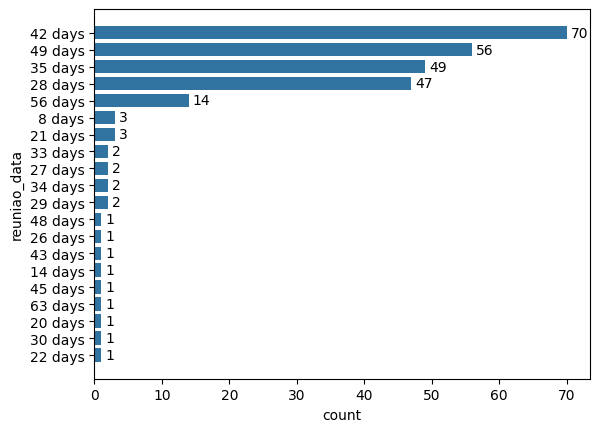

In [31]:
fig, ax = plt.subplots()
sns.barplot(dias_entre_reunioes.value_counts(), orient = 'h', ax = ax)
ax.bar_label(ax.containers[0], fmt=lambda x: int(x), padding = 3)
plt.plot()

A maior ocorrência de dias entre reuniões foram 42 dias, seguido por 49 dias. Mas será que pelo menos em média, as reuniões ocorrem a cada 45 dias?

In [32]:
dias_entre_reunioes.agg(['mean', 'median']).to_frame()

reuniao_data
mean   39 days 03:53:30.810810811
median           42 days 00:00:00

A média foi 39 dias enquanto a mediana foi de 42 dias. Claramente o fato de ter havido 8 dias entre reuniões fez com que a média diminuísse. Vamos estudar melhorar a distribuição dos dados.

<Axes: ylabel='reuniao_data'>

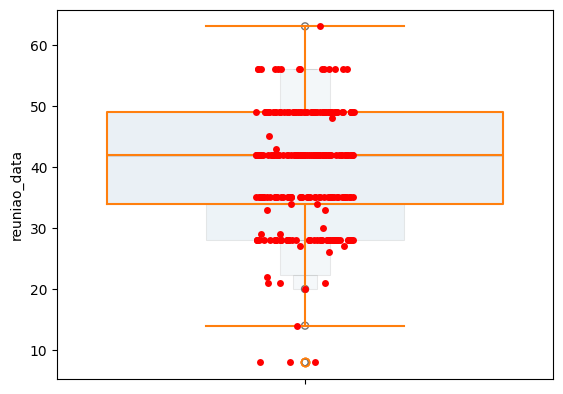

In [33]:
dias_entre_reunioes = (dias_entre_reunioes.astype('str').str.split().str[0]).astype('int')
ax = sns.boxenplot(dias_entre_reunioes, alpha= 0.1)
sns.boxplot(dias_entre_reunioes, fill = False, ax = ax)
sns.stripplot(dias_entre_reunioes, color = 'red', ax = ax)

Aparentemente temos pelo menos 3 outliers, que sem dúvidas 3 correspondem aos 8 dias entre reuniões. Mas para que tenhamos certeza, vamos identificá-los

In [34]:
def boxplot_outlier_filtro(data: pd.Series) -> pd.Series:
    '''Retorna um filtro para isolar outliers 
    
    Parametros:
    ---
    data: pd.Series
        Dados a serem filtrados

    Retorna:
    ---
    pd.Series:
        Série de booleans onde True é outlier e False não
    '''
    data_mean = data.mean()
    data_quartsup = data.quantile(.75)
    data_quartinf = data.quantile(.25)
    data_interquartil = data_quartsup - data_quartinf
    fator = 1.5

    filtro_sup = (data > data_quartinf + (fator * data_interquartil)) 
    filtro_inf = (data < data_quartinf - (fator * data_interquartil)) 

    return filtro_sup | filtro_inf

In [35]:
intrareunioes_outliers = dias_entre_reunioes[boxplot_outlier_filtro(dias_entre_reunioes)].to_frame()
intrareunioes_outliers = intrareunioes_outliers.rename(columns = {intrareunioes_outliers.columns[0]: 'intrareuniao_outlier'})
intrareunioes_outliers

intrareuniao_outlier
54                     63
189                     8
246                     8
256                     8

Na verdade temos 4 outliers. Não posso negar que 8 dias entre reuniões me fez questionar se isso ocorreu devido a reuniões extraordinárias.

In [36]:
intrareuniao_outlier_filtro = boxplot_outlier_filtro(dias_entre_reunioes).reindex(np.arange(0, len(selic_df)), fill_value = False)
selic_df[intrareuniao_outlier_filtro]

reuniao_num reuniao_data reuniao_vies  meta_selic_pctaa  tban_pctam   
54          211ª   2017-12-06     sem viés               7.0         NaN  \
189  76ª ex. (8)   2002-10-14     sem viés              21.0         NaN   
246          27ª   1998-09-02          n/a              19.0       29.75   
256      17ª (7)   1997-10-22          n/a               1.0        1.00   

     taxa_selic_pct  taxa_selic_pctaa vigencia_inicio vigencia_fim   
54             1.15              6.90      2017-12-07   2018-02-07  \
189            0.53             20.90      2002-10-15   2002-10-22   
246            0.45             25.49      1998-09-03   1998-09-10   
256            3.04             45.90      1997-11-01   1997-11-30   

    data_comunicao_decisao_vies  
54                          NaT  
189                         NaT  
246                         NaT  
256                         NaT

Vamos melhorar mais um pouco avaliando a vizinhança

In [37]:
intrareunioes_outliers_idx = intrareunioes_outliers.index
intrareunioes_outliers_idxvizinhos = []

for i in intrareunioes_outliers_idx:
    if i > 0 and i <= len(selic_df):
        intrareunioes_outliers_idxvizinhos.extend([i - 1, i, i + 1])

selic_df.loc[intrareunioes_outliers_idxvizinhos, :]

reuniao_num reuniao_data reuniao_vies  meta_selic_pctaa  tban_pctam   
53          212ª   2018-02-07          n/a              6.75         NaN  \
54          211ª   2017-12-06     sem viés              7.00         NaN   
55          210ª   2017-10-25     sem viés              7.50         NaN   
188          77ª   2002-10-22     sem viés             21.00         NaN   
189  76ª ex. (8)   2002-10-14     sem viés             21.00         NaN   
190          75ª   2002-09-18     sem viés             18.00         NaN   
245  28ª ex. (8)   1998-09-10          n/a             19.00       49.75   
246          27ª   1998-09-02          n/a             19.00       29.75   
247          26ª   1998-07-29          n/a             19.75       25.75   
255  18ª ex. (8)   1997-10-30          n/a              3.05        3.23   
256      17ª (7)   1997-10-22          n/a              1.00        1.00   
257          16ª   1997-09-17          n/a              1.58        1.78   

     taxa_selic_pct  taxa_selic_pctaa vigencia_inicio vigencia_fim   
53             0.72              6.65      2018-02-08   2018-03-21  \
54             1.15              6.90      2017-12-07   2018-02-07   
55             0.80              7.40      2017-10-26   2017-12-06   
188            1.44             20.90      2002-10-23   2002-11-20   
189            0.53             20.90      2002-10-15   2002-10-22   
190            1.18             17.90      2002-09-19   2002-10-14   
245            2.58             40.18      1998-09-11   1998-10-07   
246            0.45             25.49      1998-09-03   1998-09-10   
247            1.76             19.25      1998-07-30   1998-09-02   
255            3.18             45.67      1997-10-31   1997-11-30   
256            3.04             45.90      1997-11-01   1997-11-30   
257            1.53             19.05      1997-10-01   1997-10-30   

    data_comunicao_decisao_vies  
53                          NaT  
54                          NaT  
55                          NaT  
188                         NaT  
189                         NaT  
190                         NaT  
245                         NaT  
246                         NaT  
247                         NaT  
255                         NaT  
256                         NaT  
257                         NaT

Era o que eu havia suspeitado, após dia 22 de outubro de 1997 houve uma reunião extraordinária em 8 dias. O mesmo ocorreu depois do dia 2 de setembro de 2002. Já no dia 14 outubro de 2002 houve uma reunião extraordinária cujo efeito durou apenas os 8 dias até a reunião do dia 22.  
Sobre a diferença 63 dias entre as reuniões do dia 6 de dezembro a 7 de fevereiro, não achei um motivo específico; o que eu encontrei foi que o calendário de reuniões já havia sido divulgado no dia 30 de junho de 2017 (<a href = 'https://economia.uol.com.br/noticias/valor-online/2017/06/30/bc-divulga-calendario-de-reunioes-do-copom-em-2018.htm'>ref<a>). Como a reunião 218º não ocorreu em janeiro, me surgiu a dúvida do quão frequente são as reuniões em janeiro.

In [38]:
selic_df.iat[-1, 1]

Timestamp('1996-06-26 00:00:00')

Como os registros começaram em junho, considerarei somente a partir de 1997

In [39]:
selic_df.loc[selic_df['reuniao_data'].dt.month == 1, ['reuniao_num', 'reuniao_data']]

reuniao_num reuniao_data
5          260ª   2024-01-31
29         236ª   2021-01-20
61         204ª   2017-01-11
69         196ª   2016-01-20
77         188ª   2015-01-21
85         180ª   2014-01-15
93         172ª   2013-01-16
101        164ª   2012-01-18
109        156ª   2011-01-19
117        148ª   2010-01-27
125        140ª   2009-01-21
133        132ª   2008-01-23
141        124ª   2007-01-24
149        116ª   2006-01-18
161        104ª   2005-01-19
173         92ª   2004-01-21
185         80ª   2003-01-22
198         67ª   2002-01-23
210         55ª   2001-01-17
224         43ª   2000-01-19
241         32ª   1999-01-18
252         21ª   1998-01-28
265          8ª   1997-01-22

Pelo que podemos observar da tabela acima, todo ano até o ano de 2017, houve reuniões em janeiro. Parece que alguma coisa mudou depois desse ano para que os anos seguintes não tivessem reuniões nesse mês, retornando apenas em 2021 e depois em 2024 (ano atual). Podemos então esperar uma frequência alta.

In [40]:
selic_df.loc[selic_df['reuniao_data'].dt.month == 1, 'reuniao_data'].count() / (selic_df.iat[0, 1].year - (selic_df.iat[-2, 1].year + 1))

0.8518518518518519

Uma possível direção para entender a diminuição da frequência de reuniões nos últimos anos e verificar a quantidade de reuniões por ano.

In [41]:
reunioes_ocorrencia = selic_df[['reuniao_data']].set_index('reuniao_data')
reunioes_ocorrencia['ocorrencia'] = 1
reunioes_anuais_ocorrencia = reunioes_ocorrencia.resample('Y').sum()
reunioes_anuais_ocorrencia

ocorrencia
reuniao_data            
1996-12-31             7
1997-12-31            13
1998-12-31            11
1999-12-31            11
2000-12-31            12
2001-12-31            12
2002-12-31            13
2003-12-31            12
2004-12-31            12
2005-12-31            12
2006-12-31             8
2007-12-31             8
2008-12-31             8
2009-12-31             8
2010-12-31             8
2011-12-31             8
2012-12-31             8
2013-12-31             8
2014-12-31             8
2015-12-31             8
2016-12-31             8
2017-12-31             8
2018-12-31             8
2019-12-31             8
2020-12-31             8
2021-12-31             8
2022-12-31             8
2023-12-31             8
2024-12-31             6

Olha só! Até o ano de 2015, tínhamos um maior número de reuniões anuais. Depois de 2015, parece que ficou o número de reuniões ficou limitada a 8. Note que o maior número de reuniões não é explicado pela ocorrência de reuniões extraordinárias, pois essas reuniões aconteceram em 2002 e 1997, onde tivemos 13 reuniões anuais, e 1998, com 11 reuniões anuais. Mas tudo isso não necessariamente responde a menor frequência de reuniões em janeiro. Analisaremos, agora, por semestre.

In [42]:
reunioes_ocorrencia.resample('6m').sum()

ocorrencia
reuniao_data            
1996-06-30             1
1996-12-31             6
1997-06-30             6
1997-12-31             7
1998-06-30             5
1998-12-31             6
1999-06-30             5
1999-12-31             6
2000-06-30             6
2000-12-31             6
2001-06-30             6
2001-12-31             6
2002-06-30             6
2002-12-31             7
2003-06-30             6
2003-12-31             6
2004-06-30             6
2004-12-31             6
2005-06-30             6
2005-12-31             6
2006-06-30             4
2006-12-31             4
2007-06-30             4
2007-12-31             4
2008-06-30             4
2008-12-31             4
2009-06-30             4
2009-12-31             4
2010-06-30             4
2010-12-31             4
2011-06-30             4
2011-12-31             4
2012-06-30             4
2012-12-31             4
2013-06-30             4
2013-12-31             4
2014-06-30             4
2014-12-31             4
2015-06-30             4
2015-12-31             4
2016-06-30             4
2016-12-31             4
2017-06-30             4
2017-12-31             4
2018-06-30             4
2018-12-31             4
2019-06-30             4
2019-12-31             4
2020-06-30             4
2020-12-31             4
2021-06-30             4
2021-12-31             4
2022-06-30             4
2022-12-31             4
2023-06-30             4
2023-12-31             4
2024-06-30             4
2024-12-31             2

A partir de 2015, temos 4 reuniões por semestre, mas ainda não tenho minha resposta. Proponho tentar por trimestre

In [43]:
reunioes_ocorrencia[reunioes_ocorrencia.index > '2015'].resample('Q').sum()

ocorrencia
reuniao_data            
2015-03-31             2
2015-06-30             2
2015-09-30             2
2015-12-31             2
2016-03-31             2
2016-06-30             2
2016-09-30             2
2016-12-31             2
2017-03-31             2
2017-06-30             2
2017-09-30             2
2017-12-31             2
2018-03-31             2
2018-06-30             2
2018-09-30             2
2018-12-31             2
2019-03-31             2
2019-06-30             2
2019-09-30             2
2019-12-31             2
2020-03-31             2
2020-06-30             2
2020-09-30             2
2020-12-31             2
2021-03-31             2
2021-06-30             2
2021-09-30             2
2021-12-31             2
2022-03-31             2
2022-06-30             2
2022-09-30             2
2022-12-31             2
2023-03-31             2
2023-06-30             2
2023-09-30             2
2023-12-31             2
2024-03-31             2
2024-06-30             2
2024-09-30             2

Duas reuniões por trimestre. Após uma pesquisa na internet sobre as reuniões, não encontrei nada que indicasse uma mudança formal. Me parece que a aquela reunião não ocorreu em janeiro e não há nada extraordinário nisso. O que eu encontrei foi que antes de 1998, as reuniões  <a href='https://www1.folha.uol.com.br/fsp/1997/12/18/dinheiro/45.html'>eram mensais e passariam a ser realizadas a cada 5 ou 6 semanas </a>. Em 2005, como é perceptível pela tabela acima, ocorre uma nova <a href= 'https://www1.folha.uol.com.br/fsp/dinheiro/fi0111200509.htm'>diminuição de encontros para 8</a>.  
Mudando de assunto, enquanto eu estava pesquisando algumas informações sobre as reuniões, li que, historicamente, a diferença da Meta Selic para a Taxa Selic é de 0,1 ou 0,11 pontos percentuais (<a href='https://t2.com.br/blog/selic-meta-x-selic-over/'>ref<a>). Vamos checar

In [44]:
selic_df['taxaemeta_dif'] = selic_df['meta_selic_pctaa'] - selic_df['taxa_selic_pctaa']
selic_df.head()

reuniao_num reuniao_data reuniao_vies  meta_selic_pctaa  tban_pctam   
0        265ª   2024-09-18          n/a             10.75         NaN  \
1        264ª   2024-07-31          n/a             10.50         NaN   
2        263ª   2024-06-19          n/a             10.50         NaN   
3        262ª   2024-05-08          n/a             10.50         NaN   
4        261ª   2024-03-20          n/a             10.75         NaN   

   taxa_selic_pct  taxa_selic_pctaa vigencia_inicio vigencia_fim   
0             NaN               NaN      2024-09-19   2024-10-12  \
1            1.38             10.40      2024-08-01   2024-09-18   
2            1.18             10.40      2024-06-20   2024-07-31   
3            1.15             10.40      2024-05-09   2024-06-19   
4            1.33             10.65      2024-03-21   2024-05-08   

  data_comunicao_decisao_vies  taxaemeta_dif  
0                         NaT            NaN  
1                         NaT            0.1  
2                         NaT            0.1  
3                         NaT            0.1  
4                         NaT            0.1

<Axes: xlabel='vigencia_inicio'>

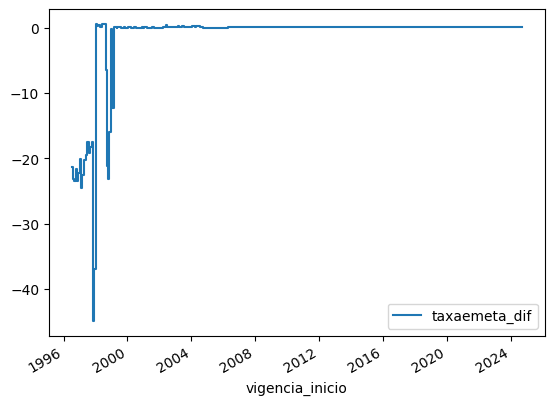

In [45]:
selic_df.plot(x = 'vigencia_inicio', y =  'taxaemeta_dif', drawstyle='steps-post')

Numa análise rápida, me parece que a partir de 1999, tivemos uma estabilização da diferença. E por volta de  2006, o valor tem estado constante. Para melhorar a análise, vamos limitar ao período 1996-1999 e depois 1999-2024.

<Axes: xlabel='vigencia_inicio'>

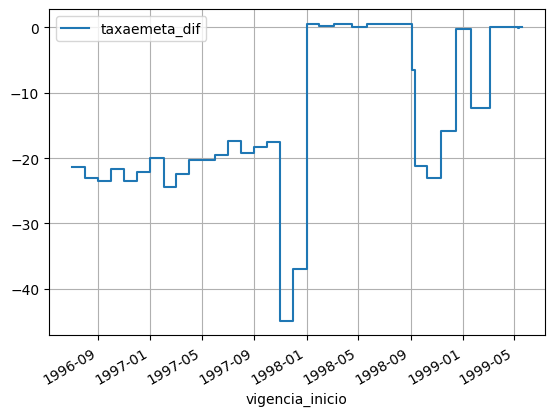

In [46]:
selic_df[selic_df['vigencia_inicio'] < '1999-06'].plot(x = 'vigencia_inicio', y = 'taxaemeta_dif', drawstyle='steps-post', grid=True)

Até 1997, tínhamos a meta menor do que a taxa por volta de 20 pontos percentuais. No final de 1997, há uma queda vertiginosa que leva a diferença a mais de 40 pontos percentuais, que pode ser explicada pelo já comentado <a href='https://en.wikipedia.org/wiki/October_27,_1997,_mini-crash'>crash na bolsa de Hong Kong</a> (<a href = 'https://www1.folha.uol.com.br/fsp/1997/10/31/dinheiro/8.html'>ref</a>). Já em janeiro de 1998, a diferença cai para aproximadamente 0 e se mantém, variando ainda próximo de 0, até setembro de 1998, onde ocorre outra queda brusca fazendo a diferença chegar a 20 pontos percentuais. Depois de uma recuperação no final de dezembro de 1998 há uma queda para aproximadamente 12 pontos percentuais, mas logo a diferença volta a ser 0.  
Agora me pergunto o porquê dessa discrepância entre a meta e a taxa efetiva. Para melhorar o entendimento, vamos plotar os dados da meta e da taxa junto da taxaemeta_dif

<Axes: xlabel='vigencia_inicio'>

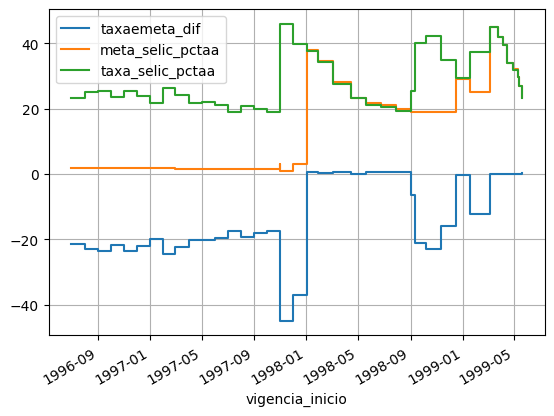

In [47]:
selic_df[selic_df['vigencia_inicio'] < '1999-06'].plot(
    x = 'vigencia_inicio', 
    y =  ['taxaemeta_dif', 'meta_selic_pctaa', 'taxa_selic_pctaa'], 
    drawstyle='steps-post', 
    grid=True
)

Interessante que até 1998, a meta não parecia servir de fato como meta, pois sempre havia uma defasagem de pelo menos 20 pontos percentuais. Só vemos a meta acompanhar a taxa a partir de janeiro de 1998 até setembro do mesmo ano, onde a defasagem atinge até um pouco mais de 20 pontos, só voltando a acompanhar a taxa em março de 99. O que será que explica esse desprendimento da meta e da taxa selic por tanto tempo?  
Voltando a página de onde retirei os <a href = 'https://www.bcb.gov.br/controleinflacao/historicotaxasjuros'></a> pude perceber um asterisco que passou desapercebido: 
* No período de 1/7/96 a 4/3/99, o COPOM fixava a TBC e, a partir de 5/3/99, com a extinção desta, passou a divulgar a meta para a Taxa SELIC para fins de política monetária.
* A partir de 2/01/98, as taxas de juros passaram a ser fixadas na expressão anual.   

Ou seja, não havia o conceito de Meta Selic, tal qual conhecemos hoje, antes de junho de 1999, como pode ser visto <a href= 'https://www.bcb.gov.br/pec/appron/Apres/200504PEP-Metas%20de%20Infla%E7%E3o%20e%20Evolu%E7%E3o%20da%20Taxa%20de%20C%E2mbio-Afonso%20Bevilaqua.pdf'>aqui</a>. Acho um grande erro colocar conceitos distintos em uma mesma coluna, mesmo que sinalizado. Para piorar, antes de janeiro de 1998, as taxas na tabela não eram anualizadas, levando a uma confusão.  Pesquisando mais a respeito da TBC, ela foi criada junto com a TBAN em 1996, segundo a <a href='https://www.bcb.gov.br/pec/boletim/Banual96/banualc2.asp?idpai=TARIFA&frame=1'> ata do copom de 1996</a>. Assim foi implementado pelo Copom o sistema de bandas de juros, onde TBAN era o teto e o TBC era o piso (<a href= 'https://www1.folha.uol.com.br/fsp/dinheiro/fi05039906.htm'>ref</a>).  
Vale ressaltar que o Copom foi instituído dia 20 de junho de 1996  com o objetivo de estabelecer as diretrizes da política monetária e de definir a taxa de juros (<a href = 'https://www.bcb.gov.br/htms/copom_normas/a-hist.asp?frame=1'>ref</a>), nos moldes de outros bancos centrais da Europa e dos EUA. A criação da TBC ocorreu dia 29 de maio de 1996 (<a href = 'https://www.bcb.gov.br/pre/normativos/circ/1996/pdf/circ_2698_v1_O.pdf'>ref</a>) enquanto que TBAN foi criada dia 21 de agosto de 1996 (<a href= 'https://normativos.bcb.gov.br/Lists/Normativos/Attachments/45791/Circ_2711_v1_O.pdf'>ref</a>) o que casa com os dados que temos. A Meta Selic, propriamente dita, foi estabelecida na reunião de <a href= 'https://www.bcb.gov.br/pre/normativos/circ/1999/pdf/circ_2868_v2_l.pdf'>4 de março de 1999</a>.  
Como a tabela está bagunçada por opção do BCB, vou mover os dados do tbam mensal para uma nova coluna

In [48]:
selic_df['tbc_pctam'] = selic_df.loc[selic_df['reuniao_data'] < '1999-03-04', 'meta_selic_pctaa']

In [49]:
selic_df.loc[selic_df['reuniao_data'] < '1999-03-04', 'meta_selic_pctaa'] = np.nan

Lembrando que os dados que retiramos da coluna meta_selic_pctaa estão parcialmente anualizados. Para fazer a distinção, alocamos para uma nova coluna tbc_pctaa os dados de a partir de 2 de janeiro de 1998. 

In [50]:
selic_df['tbc_pctaa'] = selic_df.loc[selic_df['vigencia_inicio'] >= '1998-01-02', 'tbc_pctam']
selic_df.loc[selic_df['vigencia_inicio'] >= '1998-01-02', 'tbc_pctam'] = np.nan
selic_df.tail()

reuniao_num reuniao_data reuniao_vies  meta_selic_pctaa  tban_pctam   
268          5ª   1996-10-23          n/a               NaN        1.90  \
269          4ª   1996-09-23          n/a               NaN        1.93   
270          3ª   1996-08-21          n/a               NaN         NaN   
271          2ª   1996-07-30          n/a               NaN         NaN   
272          1ª   1996-06-26          n/a               NaN         NaN   

     taxa_selic_pct  taxa_selic_pctaa vigencia_inicio vigencia_fim   
268            1.80             25.27      1996-11-01   1996-11-30  \
269            1.86             23.48      1996-10-01   1996-10-31   
270            1.90             25.40      1996-09-01   1996-09-30   
271            1.97             25.01      1996-08-01   1996-08-31   
272            1.93             23.28      1996-07-01   1996-07-31   

    data_comunicao_decisao_vies  taxaemeta_dif  tbc_pctam  tbc_pctaa  
268                         NaT         -23.49       1.78        NaN  
269                         NaT         -21.66       1.82        NaN  
270                         NaT         -23.52       1.88        NaN  
271                         NaT         -23.11       1.90        NaN  
272                         NaT         -21.38       1.90        NaN

A divulgação do TBAN também foi anualizada a partir do mesmo dia

In [51]:
selic_df['tban_pctaa'] = selic_df.loc[selic_df['vigencia_inicio'] >= '1998-01-02', 'tban_pctam'] 
selic_df.loc[selic_df['vigencia_inicio'] >= '1998-01-02', 'tban_pctam'] = np.nan

Falta apenas corrigir a coluna taxaemeta_dif

In [52]:
selic_df.loc[selic_df['reuniao_data'] < '1999-03-04', 'taxaemeta_dif'] = np.nan

Revisitamos o gráfico de taxaedmeta_dif

In [53]:
import plotly.graph_objs as go

def step_plot(x: pd.Series, y1: pd.Series, y1_label: str, yaxis_label: str, y2 : pd.Series | None = None, y2_label : str | None = None, fill : bool | None = None, step : str | None = None):
    '''
    Plota gráfico escada (step)

    Parametros: 
    --
    x: pd.Series
        Variável x
    y1: pd.Series
        Variável y1
    y1_label: str
        Nome da variavel y1
    yaxis_label: str
        Nome do vértice y
    y1: pd.Series, optional
        Variável y2
    y2_label : str
        Nome da variável y2
    fill: bool
        Caso True preenche gráfico
    step: str
        Caso pre, o degrau estende até o valor anterior de mudança; caso post, o degrau começa no valor de mudança
    '''
    fig = go.Figure()
    config = {'scrollZoom': True}
    
    if fill:
        fill = 'tozeroy'
    else:
        fill = None

    if step == 'post':
        step = 'hv'
    elif step == 'pre':
        step = 'vh'
    
    fig.add_trace(go.Scatter(name = y1_label, x=x, y=y1, line = {"shape": step}, mode= 'lines', fill = fill))
    if y2 is not None:
        fig.add_trace(go.Scatter(name = y2_label, x=x, y=y2, line = {"shape": 'hv'}, mode= 'lines'))
    fig.update_layout(xaxis_title = 'ano', yaxis_title = yaxis_label ,width=900, height=500)
    fig.update_xaxes(spikemode='across+marker',
                     spikethickness = -1,
                     spikesnap = 'data',
                     spikecolor = 'gray')
    fig.update_yaxes(spikemode='across+marker',
                     spikethickness = -1,
                     spikesnap = 'data',
                     spikecolor = 'gray',
                     fixedrange = True)
    fig.update_traces(mode="markers+lines", hovertemplate=None)
    fig.update_layout(hovermode="x unified")

    fig.show(config=config)

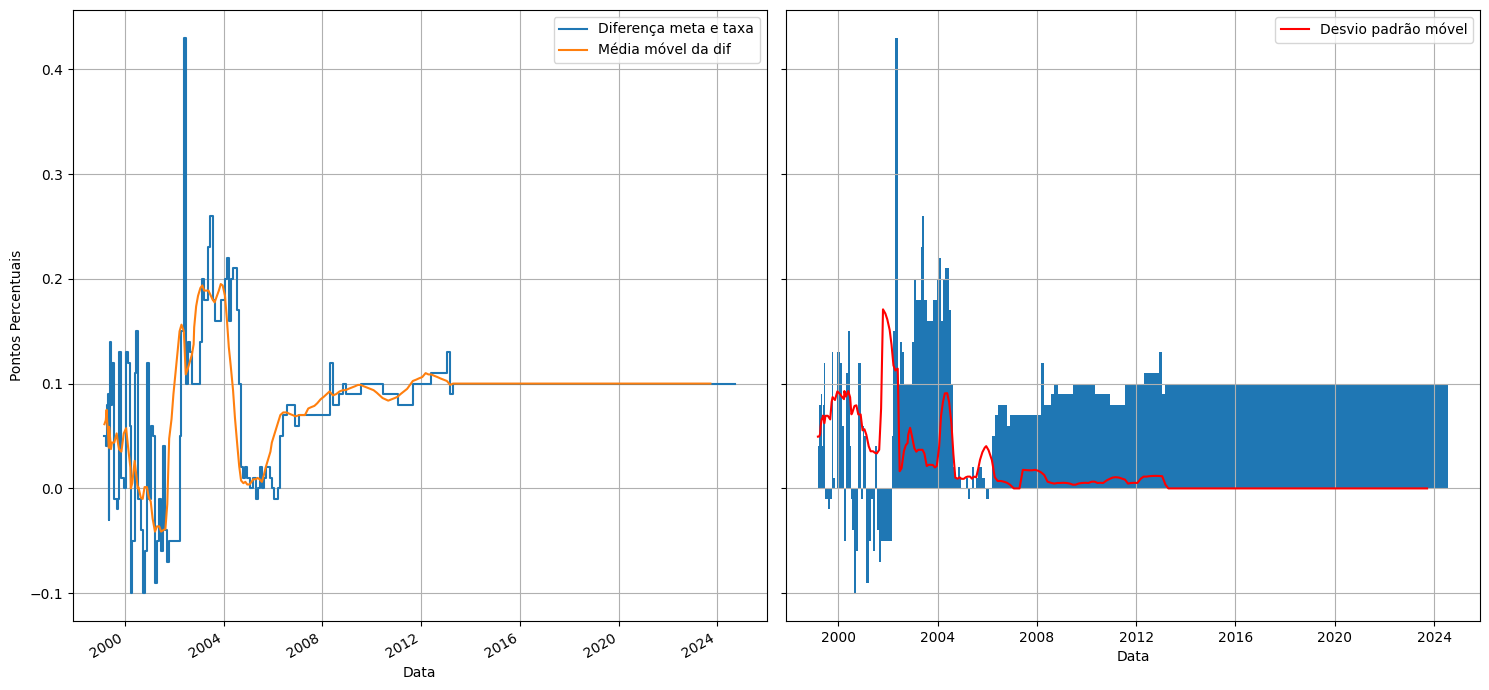

In [54]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7), sharey = True)

selic_df.plot(x = 'vigencia_inicio',  y = 'taxaemeta_dif', drawstyle='steps-post', grid=True, ax = axs[0], label= 'Diferença meta e taxa')
axs[0].plot(selic_df.loc[:,'vigencia_inicio'], selic_df.loc[:,'taxaemeta_dif'].rolling(8).mean(), label= 'Média móvel da dif')
axs[0].set_xlabel('Data')
axs[0].set_ylabel('Pontos Percentuais')
axs[0].legend()

axs[1].fill_between(selic_df['vigencia_inicio'], selic_df['taxaemeta_dif'], step='post')
axs[1].plot(selic_df.loc[:,'vigencia_inicio'], selic_df.loc[:,'taxaemeta_dif'].rolling(8).std(), 'r-', label= 'Desvio padrão móvel')
axs[1].set_xlabel('Data')
axs[1].grid()
axs[1].legend()


fig.tight_layout()
plt.ylabel('Pontos percentuais')
plt.xlabel('Data')
plt.show()

Observamos que até o final de 2001, tivemos uma tendência de queda entre a diferença da meta e da taxa selic, saindo de um pouco abaixo de 0,1 até valores negativos, ou seja, a taxa chegou ficou acima da meta em algumas ocasiões, que segundo o BCB, foi devido a  alta da taxa de câmbio e o ritmo de crescimento da economia, que estava mais acelerado que o previsto (<a href = 'https://feeds.folha.uol.com.br/fsp/dinheiro/fi3103200102.htm'>ref</a>). Logo após, <a href= 'https://www1.folha.uol.com.br/folha/dinheiro/ult91u42790.shtml'>com a queda dos juros</a>, temos um tendência ascendente até atingir um pico (máximo global) que ultrapassa 0,4 pontos percentuais. No gráfico da direita, nesse período, temos um pico mais pronunciado no desvio padrão móvel, pois há uma maior oscilação entre valores negativos e positivos, indicando maior volatilidade. Depois desse pico, como podemos ver no primeiro gráfico, há uma queda brusca para abaixo de 0,15, mas logo a diferença volta a crescer para próximo de 0,2, permanecendo até o final de 2003.  A partir daí, há uma novo tombo, devido ao aumento gradual da taxa de juros (<a href="https://www.bcb.gov.br/pec/boletim/banual2004/rel2004introdp.pdf">ref. pág 11</a>), fazendo a taxa se aproximar da meta e, em algumas datas, até ultrapassar. Depois, temos um aumento em 2006, <a href='https://www1.folha.uol.com.br/fsp/dinheiro/fi2007200604.htm'>devido a queda no juros</a>, e a partir daí começa um período de menor variação até atingir, por volta de 2013, a estabilidade, onde a diferença fica contante, em 0,1 pontos percentuais. 

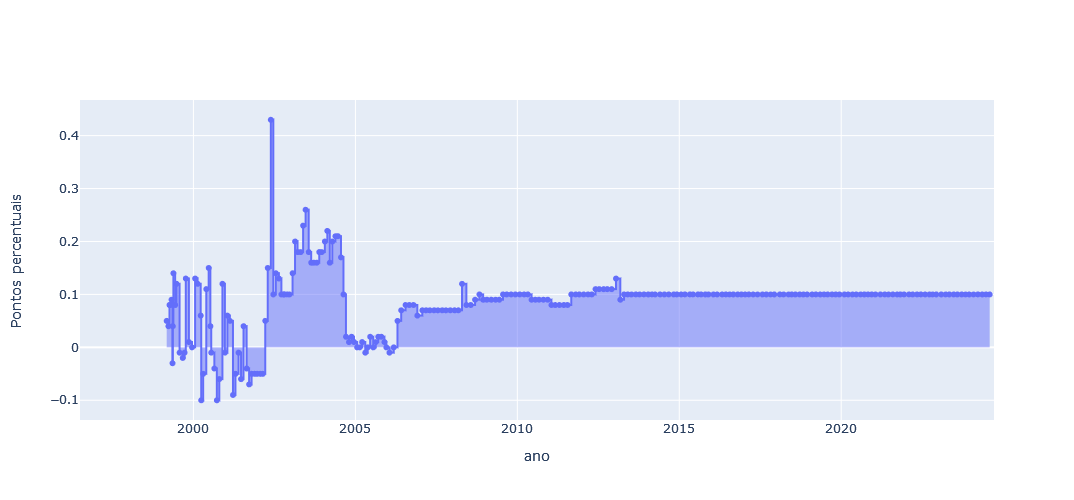

In [55]:
step_plot(selic_df['vigencia_inicio'], selic_df['taxaemeta_dif'], 'Diferença entre meta e taxa selic', 'Pontos percentuais', fill = True, step = 'pre')

É muito curioso que antes de 2013 a diferença variava bastante e em um certo dia ela passou a ser constante. Do gráfico acima podemos facilmente encontrar que a partir do mês de abril de 2013, a diferença ficou em 0,1. Não encontrei nada que indicasse uma mudança que justificasse o estabelecimento da meta sempre acima da Selic over em 0,1. No entanto, sabendo que o BCB faz operações no mercado de modo que a Selic over fique alinhada a meta, me leva a pensar que o BCB passou a ser mais rígido em fazer a taxa ser fixa e fixada a 0,1 pontos percentuais abaixo da meta.

Segundo o site da <a href= 'https://t2.com.br/blog/selic-meta-x-selic-over/'>t2</a>, a diferença entre a meta e a selic é sempre 0,1 ou 0,11, daí me vem a dúvida de quantas vezes o valor foi 0,11.

In [56]:
selic_df.loc[np.isclose(selic_df['taxaemeta_dif'], 0.11), ['reuniao_data', 'vigencia_inicio', 'taxaemeta_dif']]

reuniao_data vigencia_inicio  taxaemeta_dif
94    2012-11-28      2012-11-29           0.11
95    2012-10-10      2012-10-11           0.11
96    2012-08-29      2012-08-30           0.11
97    2012-07-11      2012-07-12           0.11
98    2012-05-30      2012-05-31           0.11
219   2000-05-24      2000-05-25           0.11

Somente 6 vezes considerando toda a série histórica da meta selic e 5 vezes se considerarmos a partir da década passada como mais recente.

Notando que a diferença entre a meta e a taxa chegou a ser negativa, me pergunto quantas vezes isso ocorreu

In [57]:
print(f'{len(selic_df[selic_df["taxaemeta_dif"] < 0])} de um total de {len(selic_df[selic_df["reuniao_data"] >= "1999-03-04"])} períodos')

24 de um total de 233 períodos


Antes de prosseguir com a análise, me surgiu a curiosidade de se, durante o período de bandas de juros, a taxa selic chegou a ultrapassar esse limites. Vamos plotar

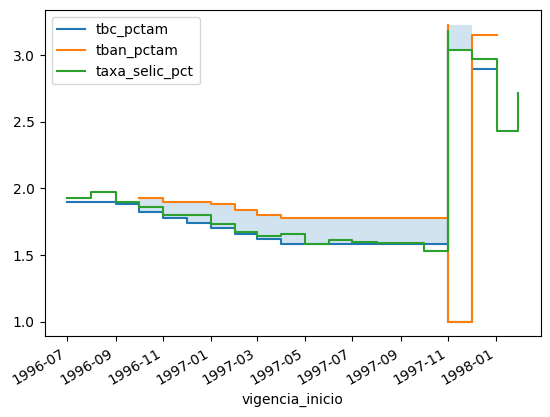

In [58]:
fig, ax = plt.subplots()
selic_df.plot(
    x = 'vigencia_inicio', 
    y =  ['tbc_pctam', 'tban_pctam'], 
    drawstyle='steps-post', 
    grid=True,
    ax = ax
)
selic_df[selic_df['vigencia_inicio'] < '02/01/98'].plot(
    x = 'vigencia_inicio', 
    y = 'taxa_selic_pct', 
    drawstyle='steps-post', 
    ax = ax)
ax.fill_between(selic_df['vigencia_inicio'], selic_df['tbc_pctam'], selic_df['tban_pctam'], alpha= .2, step='pre')

Temos um problema no mês onze de 1997. Isso, na verdade, já foi visto lá atrás e trata-se do problema de datas que tinhamos. 

In [59]:
selic_df[selic_df['reuniao_data'] ==  '1997-10-22'][['reuniao_data', 'tban_pctam', 'tbc_pctam']]

reuniao_data  tban_pctam  tbc_pctam
256   1997-10-22         1.0        1.0

Estranhamente tban e o tbc estavam com a mesma taxa de juros. Pesquisando mais sobre essa reunião em específico, encontro que as taxas não entraram em vigor (<a href='https://centrodeeconomiapolitica.org/repojs/index.php/journal/article/download/414/404/787'>ref. pág. 443</a>). Vamos excluir essa linha 

In [60]:
selic_df = selic_df.drop(selic_df[selic_df['reuniao_data'] ==  '1997-10-22'].index, axis = 0)

Plotamos novamente o gráfico com as bandas de juros

[]

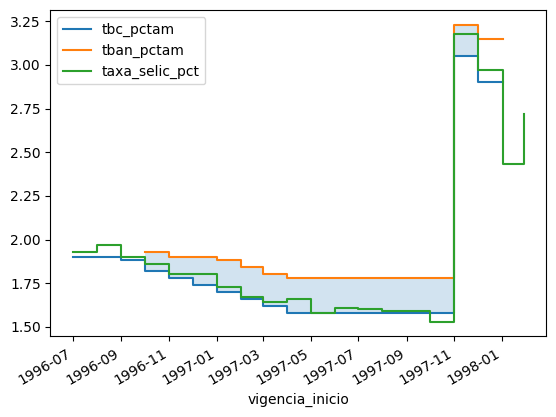

In [61]:
fig, ax = plt.subplots()
selic_df.plot(
    x = 'vigencia_inicio', 
    y =  ['tbc_pctam', 'tban_pctam'], 
    drawstyle='steps-post', 
    grid=True,
    ax = ax
)
selic_df[selic_df['vigencia_inicio'] < '02/01/98'].plot(
    x = 'vigencia_inicio', 
    y = 'taxa_selic_pct', 
    drawstyle='steps-post', 
    ax = ax)
ax.fill_between(selic_df['vigencia_inicio'], selic_df['tbc_pctam'], selic_df['tban_pctam'], alpha= .2, step='pre')
plt.plot()

A partir do gráfico acima, notamos que a taxa selic tendeu a ficar muito mais próxima da Taxa Básica do Banco Central (TBC) do que da Taxa de Assistência do Banco Central (TBAN), com exceção de novembro de 1997, onde houve o aumento da taxa selic devido a crise que se instalou com o crash da bolsa de Hong Kong. Além disso, o valor da taxa selic ficou pelo menos uma vez abaixo da banda inferior. Podemos conferir:

In [62]:
selic_df.query('taxa_selic_pct < tbc_pctam')

reuniao_num reuniao_data reuniao_vies  meta_selic_pctaa  tban_pctam   
257         16ª   1997-09-17          n/a               NaN        1.78  \

     taxa_selic_pct  taxa_selic_pctaa vigencia_inicio vigencia_fim   
257            1.53             19.05      1997-10-01   1997-10-30  \

    data_comunicao_decisao_vies  taxaemeta_dif  tbc_pctam  tbc_pctaa   
257                         NaT            NaN       1.58        NaN  \

     tban_pctaa  
257         NaN

Por fim, vamos ver o período em que a TBAN e a TBC foram anualizadas

[]

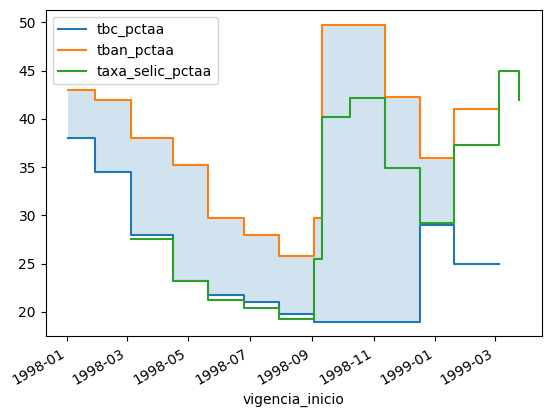

In [63]:
fig, ax = plt.subplots()
selic_df.plot(
    x = 'vigencia_inicio', 
    y =  ['tbc_pctaa', 'tban_pctaa'], 
    drawstyle='steps-post', 
    grid=True,
    ax = ax
)
selic_df.query('vigencia_inicio > "02/01/98" & vigencia_inicio < "4/3/99"').plot(
    x = 'vigencia_inicio', 
    y = 'taxa_selic_pctaa', 
    drawstyle='steps-post', 
    ax = ax)
ax.fill_between(selic_df['vigencia_inicio'], selic_df['tbc_pctaa'], selic_df['tban_pctaa'], alpha= .2, step='pre')
plt.plot()

No período em que as taxas foram anualizadas, notamos que a taxa Selic ficou abaixo do piso de juros, indicando que as bandas não foram efetivas em delimitar os juros. Vamos contar quantas vezes a taxa ficou fora das bandas.

In [64]:
len(selic_df.query('taxa_selic_pctaa < tbc_pctaa | tban_pctaa < taxa_selic_pctaa'))

7

7 vezes em um curto período de tempo.

Vamos salvar os dados transformados em um csv.

In [65]:
selic_df.to_csv('dados/selic_modificada.csv', sep = ';')

Voltando ao objeto de minha análise que é a taxa selic, percebemos que os dados estão espaçados não uniformemente, o que é requisito para poder associar com os dados do IPCA. De modo a resolver esse problema, vamos mensalizar os dados. Para isso, primeiro notamos que os dados da selic anual são anualizados considerando dias úteis em um ano, daí vem padrão usado pelo BCB que é um ano tem 252 dias úteis. Logo, uma forma de fazer a transformação é diarizar os dados considerando 252 dias, e depois calculamos o acumulado mensal considerando os dias úteis de cada mês. Vamos fazer isso para meta e para a selic (over).

In [66]:
resampledselic_df = selic_df[['vigencia_inicio', 'taxa_selic_pctaa', 'meta_selic_pctaa']].set_index('vigencia_inicio').apply(lambda x: (np.power(1 + x/100, 1/252) - 1) * 100).resample('B').ffill()
resampledselic_df.head()

taxa_selic_pctaa  meta_selic_pctaa
vigencia_inicio                                    
1996-07-01               0.083085               NaN
1996-07-02               0.083085               NaN
1996-07-03               0.083085               NaN
1996-07-04               0.083085               NaN
1996-07-05               0.083085               NaN

Para mensalizarmos, além de excluir sábados e domingos, temos também que excluir feriados. Para isso, vamos usar a biblioteca holidays

In [67]:
import holidays
    
feriados_dict = holidays.Brazil(years = range(selic_df['vigencia_inicio'].dt.year.iloc[-1],selic_df['vigencia_inicio'].dt.year.iloc[0] + 1))

Fazendo uma checagem rápida com as datas presentes <a href='https://www.bcb.gov.br/rex/sml/3-1-feriados.asp?frame=1'>no site do BCB</a>, pude constatar que não havia o feríado de Corpus Christi e nem o dia da Páscoa.

In [68]:
'2018-05-31' in feriados_dict

False

In [69]:
'2018-04-01' in feriados_dict

False

Outros dias que não constam no link mas não é considerado dia útil para o <a href="https://www.bcb.gov.br/cidadaniafinanceira/direitosdeveres"> BCB</a> são:

* Segunda-feira e terça-feira de Carnaval
* 2 de novembro
* Último dia útil do ano *

*Como há operações entre as próprias instituições financeiras no último dia do ano, então consideramos ele útil. 

In [70]:
'2018-11-02' in feriados_dict

True

In [71]:
'2018-02-13' in feriados_dict

False

Carnaval também não está. Convenientemente, encontrei uma tabela <a href='https://www.inf.ufrgs.br/~cabral/tabela_pascoa.html'>na página do Professor Roberto Cabral de Mello Borges </a> contendo datas da Páscoa, Carnaval e Corpus Christi. Note que o dia de Carnaval contido na tabela é terça, então teremos que extender para segunda também.

In [72]:
import requests
from bs4 import BeautifulSoup

feriados_tabela_url = 'https://www.inf.ufrgs.br/~cabral/tabela_pascoa.html'
feriados_data = requests.get(feriados_tabela_url).text

In [73]:
feriados_soup = BeautifulSoup(feriados_data, 'html5lib')
feriados_tabela = feriados_soup.find_all("table")

In [74]:
feriados_df = pd.read_html(str(feriados_tabela))[0]
feriados_df.head()

Cálculo da Páscoa, Carnaval e Corpus Christi   
0                                          Ano  \
1                                         1951   
2                                         1952   
3                                         1953   
4                                         1954   

  Cálculo da Páscoa, Carnaval e Corpus Christi.1   
0                                              a  \
1                                             13   
2                                             14   
3                                             15   
4                                             16   

  Cálculo da Páscoa, Carnaval e Corpus Christi.2   
0                                              b  \
1                                              3   
2                                              0   
3                                              1   
4                                              2   

  Cálculo da Páscoa, Carnaval e Corpus Christi.3   
0                                              c  \
1                                              5   
2                                              6   
3                                              0   
4                                              1   

  Cálculo da Páscoa, Carnaval e Corpus Christi.4   
0                                              d  \
1                                              1   
2                                             20   
3                                              9   
4                                             28   

  Cálculo da Páscoa, Carnaval e Corpus Christi.5   
0                                              e  \
1                                              2   
2                                              2   
3                                              5   
4                                              6   

  Cálculo da Páscoa, Carnaval e Corpus Christi.6   
0                                            d+e  \
1                                              3   
2                                             22   
3                                             14   
4                                             34   

  Cálculo da Páscoa, Carnaval e Corpus Christi.7   
0                                            Dia  \
1                                             25   
2                                             13   
3                                              5   
4                                             18   

  Cálculo da Páscoa, Carnaval e Corpus Christi.8   
0                                            Mês  \
1                                          Março   
2                                          Abril   
3                                          Abril   
4                                          Abril   

  Cálculo da Páscoa, Carnaval e Corpus Christi.9   
0                                         Páscoa  \
1                                    25/mar/1951   
2                                    13/abr/1952   
3                                    05/abr/1953   
4                                    18/abr/1954   

  Cálculo da Páscoa, Carnaval e Corpus Christi.10     Unnamed: 11  
0                                        Carnaval  Corpus Christi  
1                                     06/fev/1951     24/mai/1951  
2                                     26/fev/1952     12/jun/1952  
3                                     17/fev/1953     04/jun/1953  
4                                     02/mar/1954     17/jun/1954

A linha 0 da tabela feriados_df será o nome das colunas e vamos considerar apenas as datas

In [75]:
feriados_df = feriados_df.iloc[:, -3:]
feriados_df.columns = feriados_df.iloc[0, :]
feriados_df = feriados_df.iloc[1:, :].reset_index(drop = True)
feriados_df.head()

0       Páscoa     Carnaval Corpus Christi
0  25/mar/1951  06/fev/1951    24/mai/1951
1  13/abr/1952  26/fev/1952    12/jun/1952
2  05/abr/1953  17/fev/1953    04/jun/1953
3  18/abr/1954  02/mar/1954    17/jun/1954
4  10/abr/1955  22/fev/1955    09/jun/1955

Vamos checar os tipos

In [76]:
dfcols_type(feriados_df)

{'Páscoa': {str}, 'Carnaval': {str}, 'Corpus Christi': {str}}

Todos são strings. Vamos transformar os meses em seus respectivos valores númericos e já fazer a conversão de tipo

In [77]:
meses_num = {
    'jan':'1', 
    'fev':'2', 
    'mar':'3', 
    'abr':'4', 
    'mai':'5', 
    'jun':'6', 
    'jul':'7', 
    'ago':'8', 
    'set':'9', 
    'out':'10', 
    'nov':'11', 
    'dez':'12'
}

In [78]:
feriados_df

0         Páscoa     Carnaval Corpus Christi
0    25/mar/1951  06/fev/1951    24/mai/1951
1    13/abr/1952  26/fev/1952    12/jun/1952
2    05/abr/1953  17/fev/1953    04/jun/1953
3    18/abr/1954  02/mar/1954    17/jun/1954
4    10/abr/1955  22/fev/1955    09/jun/1955
..           ...          ...            ...
123  15/abr/2074  27/fev/2074    14/jun/2074
124  07/abr/2075  19/fev/2075    06/jun/2075
125  19/abr/2076  03/mar/2076    18/jun/2076
126  11/abr/2077  23/fev/2077    10/jun/2077
127  03/abr/2078  15/fev/2078    02/jun/2078

[128 rows x 3 columns]

In [79]:
feriados_cols = feriados_df.columns

for feriado_col in feriados_cols:
    feriados_df[feriado_col] = feriados_df[feriado_col].replace(meses_num, regex=True)
    feriados_df[feriado_col] = pd.to_datetime(feriados_df[feriado_col], format="%d/%m/%Y")
feriados_df.head()

0     Páscoa   Carnaval Corpus Christi
0 1951-03-25 1951-02-06     1951-05-24
1 1952-04-13 1952-02-26     1952-06-12
2 1953-04-05 1953-02-17     1953-06-04
3 1954-04-18 1954-03-02     1954-06-17
4 1955-04-10 1955-02-22     1955-06-09

In [80]:
feriados_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Páscoa          128 non-null    datetime64[ns]
 1   Carnaval        128 non-null    datetime64[ns]
 2   Corpus Christi  128 non-null    datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 3.1 KB


Checando dados faltantes

In [81]:
feriados_df.isnull().sum().sum()

0

Criamos a coluna Pré Carnaval, que corresponde a um dia antes da data da tabela (que é terça-feira)

In [82]:
feriados_df['Pré Carnaval'] = feriados_df['Carnaval'] + pd.Timedelta(days = -1)
feriados_df.head()

0     Páscoa   Carnaval Corpus Christi Pré Carnaval
0 1951-03-25 1951-02-06     1951-05-24   1951-02-05
1 1952-04-13 1952-02-26     1952-06-12   1952-02-25
2 1953-04-05 1953-02-17     1953-06-04   1953-02-16
3 1954-04-18 1954-03-02     1954-06-17   1954-03-01
4 1955-04-10 1955-02-22     1955-06-09   1955-02-21

Atualizamos o dicionário de feriados

In [83]:
for feriado_col in feriados_cols:
    feriados_dict.update(
        dict((date, feriado_col) for date in feriados_df[feriado_col].apply(lambda x: x.date()))
    )

In [84]:
'2018-11-02' in feriados_dict

True

Mensalizamos a taxa selic diária com o filtro criado usando o dicionário de feriados.

In [85]:
resampledselic_df = resampledselic_df[~resampledselic_df.index.isin(feriados_dict)].resample('M').sum()
resampledselic_df.tail()

taxa_selic_pctaa  meta_selic_pctaa
vigencia_inicio                                    
2024-05-31               0.829151          0.836695
2024-06-30               0.785392          0.792580
2024-07-31               0.903201          0.911467
2024-08-31               0.863931          0.871838
2024-09-30               0.510505          0.555703

Como o indice não representa uma data específica e sim um periodo, vamos mudar a coluna para periodo e renomeá-la.

In [86]:
resampledselic_df.index = resampledselic_df.index.to_period()
resampledselic_df.head()

taxa_selic_pctaa  meta_selic_pctaa
vigencia_inicio                                    
1996-07                  1.910962               0.0
1996-08                  1.949640               0.0
1996-09                  1.887001               0.0
1996-10                  1.925769               0.0
1996-11                  1.788905               0.0

In [87]:
selicmensal_df = resampledselic_df.reset_index()
selicmensal_df = selicmensal_df.rename(columns = {'vigencia_inicio': 'periodo_mes', 'meta_selic_pctaa': 'meta_acumulada_mes', 'taxa_selic_pctaa': 'selic_acumulada_mes'})
selicmensal_df.head()

periodo_mes  selic_acumulada_mes  meta_acumulada_mes
0     1996-07             1.910962                 0.0
1     1996-08             1.949640                 0.0
2     1996-09             1.887001                 0.0
3     1996-10             1.925769                 0.0
4     1996-11             1.788905                 0.0

Da tabela acima, a coluna meta_acumulada_mes apresenta como taxa o número 0 em datas onde ela não existia. Isso se deve às transformações feitas na obtenção dos valores mensais. Para lidar com isso, vamos mudar esse valor para NaN.

In [88]:
selicmensal_df['meta_acumulada_mes'] = selicmensal_df['meta_acumulada_mes'].replace(0, np.nan)

<hr>

<h3><span id='IPCA'></span>2. IPCA</h3>

Vamos agora obter os dados referente ao IPCA. Eles são divulgados pelo IBGE e podem ser encontrados facilmente <a href= 'https://ftp.ibge.gov.br/Precos_Indices_de_Precos_ao_Consumidor/IPCA/Serie_Historica/ipca_SerieHist.zip'>nesse link</a>

In [89]:
import requests
from io import BytesIO
from zipfile import ZipFile

In [90]:
ipca_url = "https://ftp.ibge.gov.br/Precos_Indices_de_Precos_ao_Consumidor/IPCA/Serie_Historica/ipca_SerieHist.zip"
file = requests.get(ipca_url).content
file_bytes = BytesIO(file)

unzipped = ZipFile(file_bytes)
ipca_file = unzipped.namelist()[0]

In [91]:
ipca_df = pd.read_excel(BytesIO(unzipped.read(ipca_file)))
ipca_df.head(10)

Unnamed: 0 Unnamed: 1      Unnamed: 2 Unnamed: 3 Unnamed: 4   
0  SÉRIE HISTÓRICA DO IPCA        NaN             NaN        NaN        NaN  \
1                      NaN        NaN             NaN        NaN        NaN   
2                      NaN        NaN             NaN        NaN        NaN   
3                      ANO        MÊS   NÚMERO ÍNDICE        (%)        NaN   
4                      NaN        NaN  (DEZ 93 = 100)         NO          3   
5                      NaN        NaN             NaN        MÊS      MESES   
6                      NaN        NaN             NaN        NaN        NaN   
7                     1994        JAN          141.31      41.31     162.13   
8                      NaN        FEV          198.22      40.27     171.24   
9                      NaN        MAR          282.96      42.75     182.96   

     Unnamed: 5 Unnamed: 6  Unnamed: 7  
0           NaN        NaN         NaN  
1           NaN        NaN  (continua)  
2      VARIAÇÃO        NaN         NaN  
3           NaN        NaN         NaN  
4             6         NO          12  
5         MESES        ANO       MESES  
6           NaN        NaN         NaN  
7        533.33      41.31     2693.84  
8        568.17      98.22     3035.71  
9        602.93     182.96     3417.39

Devido a como os dados estão dispostos na planilha de excel com uma formatação não muito amigável, as linhas da tabela estão desorganizadas e cheias de NaNs. Entretanto, é possível notar que cada linha que contém os dados de interessa, tem no máximo um NaN. Dessa forma podemos usar essa lógica como filtro.

In [92]:
ipca_df = ipca_df[ipca_df.isnull().sum(axis = 'columns') <= 1].reset_index(drop=True)
ipca_df_cols = [
    'ano',
    'mes',
    'ipca_numero_indice',
    'ipca_var_mensal',
    'ipca_var_trimestral',
    'ipca_var_semetral',
    'ipca_no_ano',
    'ipca_acumulado_ano'
]
ipca_df.columns = ipca_df_cols
ipca_df.head()

ano  mes ipca_numero_indice ipca_var_mensal ipca_var_trimestral   
0  1994  JAN             141.31           41.31              162.13  \
1   NaN  FEV             198.22           40.27              171.24   
2   NaN  MAR             282.96           42.75              182.96   
3   NaN  ABR             403.73           42.68              185.71   
4   NaN  MAI             581.49           44.03              193.36   

  ipca_var_semetral ipca_no_ano ipca_acumulado_ano  
0            533.33       41.31            2693.84  
1            568.17       98.22            3035.71  
2            602.93      182.96            3417.39  
3            648.92      303.73            3828.49  
4            695.71      481.49            4331.19

Dá para perceber que temos alguns dados na coluna ano, vamos ver se há mais em outras colunas.

In [93]:
ipca_df.isnull().sum()[ipca_df.isnull().sum() > 0]

ano    338
dtype: int64

Somente ano. Preenchemos os anos faltantes notando que somente temos a coluna ano em janeiro.

In [94]:
ipca_df['ano'] = ipca_df['ano'].ffill().astype('str')
ipca_df.head()

ano  mes ipca_numero_indice ipca_var_mensal ipca_var_trimestral   
0  1994  JAN             141.31           41.31              162.13  \
1  1994  FEV             198.22           40.27              171.24   
2  1994  MAR             282.96           42.75              182.96   
3  1994  ABR             403.73           42.68              185.71   
4  1994  MAI             581.49           44.03              193.36   

  ipca_var_semetral ipca_no_ano ipca_acumulado_ano  
0            533.33       41.31            2693.84  
1            568.17       98.22            3035.71  
2            602.93      182.96            3417.39  
3            648.92      303.73            3828.49  
4            695.71      481.49            4331.19

<h4><span id='SobreIPCA'></span>Sobre o dataset: IPCA</h4>

<table>
    <thead>
        <tr>
            <th>Variável</th>
            <th>Descrição</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>ano</th>
            <td>Ano numérico</td>
        </tr>
        <tr>
            <th>mes</th>
            <td>Nome do mês limitado a três letras</td>
        </tr>
        <tr>
            <th>ipca_numero_indice</th>
            <td>Média aritmética ponderada dos 16 índices metropolitanos mensais, que são calculados pela fórmula de Laspeyres.  </td>
        </tr>
        <tr>
            <th>ipca_var_mensal</th>
            <td>Variação mensal do índice durante o mês. </td>
        </tr>
        <tr>
            <th>ipca_var_trimestral</th>
            <td>Variação trimestral do índice considerando os últimos 3 meses. </td>
        </tr>
        <tr>
            <th>ipca_var_semetral</th>
            <td> Variação semestral do índice considerando os últimos 6 meses. </td>
        </tr>
        <tr>
            <th>ipca_no_ano</th>
            <td> Variação do índice no mês referência em relação ao índice de dezembro do ano passado ao ano de referência. </td>
        </tr>
        <tr>
            <th>ipca_acumulado_ano</th>
            <td>Soma da variação mensal de 12 meses. </td>
        </tr>
    </tbody>
</table>

Note que é a variação do ipca_numero_indice que corresponde a taxa de inflação. 

Visualizamos os tipos

In [95]:
ipca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ano                  369 non-null    object
 1   mes                  369 non-null    object
 2   ipca_numero_indice   369 non-null    object
 3   ipca_var_mensal      369 non-null    object
 4   ipca_var_trimestral  369 non-null    object
 5   ipca_var_semetral    369 non-null    object
 6   ipca_no_ano          369 non-null    object
 7   ipca_acumulado_ano   369 non-null    object
dtypes: object(8)
memory usage: 23.2+ KB


Vamos ver quais são os tipos que compõem cada coluna.

In [96]:
dfcols_type(ipca_df)

{'ano': {str},
 'mes': {str},
 'ipca_numero_indice': {float, int},
 'ipca_var_mensal': {float, int},
 'ipca_var_trimestral': {float, int},
 'ipca_var_semetral': {float, int},
 'ipca_no_ano': {float, int},
 'ipca_acumulado_ano': {float, int}}

Temos uma mistura de float e int nas coluna que são obejct. Antes de uniformizar isso, vamos criar uma coluna com os meses em formato numerico só que em string, para depois criarmos uma coluna periodo, haja vista que não faz sentido usarmos data nesse caso.

In [97]:
meses_numcap = dict((mes, str(i + 1)) for i, mes in enumerate([key.upper() for key in meses_num.keys()]))
meses_numcap

{'JAN': '1',
 'FEV': '2',
 'MAR': '3',
 'ABR': '4',
 'MAI': '5',
 'JUN': '6',
 'JUL': '7',
 'AGO': '8',
 'SET': '9',
 'OUT': '10',
 'NOV': '11',
 'DEZ': '12'}

In [98]:
ipca_df['mes_num'] = ipca_df['mes'].map(meses_numcap)
ipca_df['periodo_mes'] = ipca_df['ano'] + '-' + ipca_df['mes_num']

ipca_df['periodo_mes'] = pd.PeriodIndex(ipca_df['periodo_mes'], freq='M')
ipca_df.head()

ano  mes ipca_numero_indice ipca_var_mensal ipca_var_trimestral   
0  1994  JAN             141.31           41.31              162.13  \
1  1994  FEV             198.22           40.27              171.24   
2  1994  MAR             282.96           42.75              182.96   
3  1994  ABR             403.73           42.68              185.71   
4  1994  MAI             581.49           44.03              193.36   

  ipca_var_semetral ipca_no_ano ipca_acumulado_ano mes_num periodo_mes  
0            533.33       41.31            2693.84       1     1994-01  
1            568.17       98.22            3035.71       2     1994-02  
2            602.93      182.96            3417.39       3     1994-03  
3            648.92      303.73            3828.49       4     1994-04  
4            695.71      481.49            4331.19       5     1994-05

Transformamos os dados para seus respectivos tipos numéricos

In [99]:
for ii in range(len(ipca_df.columns) - 1):
    if ii == 1:
        continue
    ipca_df[ipca_df.columns[ii]] = pd.to_numeric(ipca_df[ipca_df.columns[ii]])
ipca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype    
---  ------               --------------  -----    
 0   ano                  369 non-null    int64    
 1   mes                  369 non-null    object   
 2   ipca_numero_indice   369 non-null    float64  
 3   ipca_var_mensal      369 non-null    float64  
 4   ipca_var_trimestral  369 non-null    float64  
 5   ipca_var_semetral    369 non-null    float64  
 6   ipca_no_ano          369 non-null    float64  
 7   ipca_acumulado_ano   369 non-null    float64  
 8   mes_num              369 non-null    int64    
 9   periodo_mes          369 non-null    period[M]
dtypes: float64(6), int64(2), object(1), period[M](1)
memory usage: 29.0+ KB


Note que as colunas ipca_var_trimestral, ipca_var_semestral e ipca_no_ano são obtidas do ipca_numero_indice por meio da soma das variações em um determinado período, portanto elas não agregam tanto para justificar elas estarem no dataframe, uma vez que somente ipca_numero_indice e ipca_var_mensal bastam. As colunas ano, mes e mes_num serão mantidas pois elas aumentam o poder de classificação dos dados. 

In [100]:
ipca_df = ipca_df[['periodo_mes', 'ano', 'mes', 'mes_num', 'ipca_numero_indice', 'ipca_var_mensal', 'ipca_acumulado_ano']]
ipca_df.head()

periodo_mes   ano  mes  mes_num  ipca_numero_indice  ipca_var_mensal   
0     1994-01  1994  JAN        1              141.31            41.31  \
1     1994-02  1994  FEV        2              198.22            40.27   
2     1994-03  1994  MAR        3              282.96            42.75   
3     1994-04  1994  ABR        4              403.73            42.68   
4     1994-05  1994  MAI        5              581.49            44.03   

   ipca_acumulado_ano  
0             2693.84  
1             3035.71  
2             3417.39  
3             3828.49  
4             4331.19

Vou ainda acrescentar uma coluna com a década de cada dado para melhorar o poder de explicação.

In [101]:
ipca_df['decada'] = (np.floor(ipca_df['ano'] / 10) * 10).astype('int')
ipca_df.head()

periodo_mes   ano  mes  mes_num  ipca_numero_indice  ipca_var_mensal   
0     1994-01  1994  JAN        1              141.31            41.31  \
1     1994-02  1994  FEV        2              198.22            40.27   
2     1994-03  1994  MAR        3              282.96            42.75   
3     1994-04  1994  ABR        4              403.73            42.68   
4     1994-05  1994  MAI        5              581.49            44.03   

   ipca_acumulado_ano  decada  
0             2693.84    1990  
1             3035.71    1990  
2             3417.39    1990  
3             3828.49    1990  
4             4331.19    1990

Falta apenas ordenar a coluna mes

In [102]:
ipca_df['mes'] = pd.Categorical(ipca_df['mes'], ordered=True, categories = meses_numcap.keys())

<hr></hr>
Combinamos os dados da selic e do ipca

In [103]:
merged_df = selicmensal_df.merge(ipca_df, how='inner', on='periodo_mes')
merged_df.head()

periodo_mes  selic_acumulada_mes  meta_acumulada_mes   ano  mes  mes_num   
0     1996-07             1.910962                 NaN  1996  JUL        7  \
1     1996-08             1.949640                 NaN  1996  AGO        8   
2     1996-09             1.887001                 NaN  1996  SET        9   
3     1996-10             1.925769                 NaN  1996  OUT       10   
4     1996-11             1.788905                 NaN  1996  NOV       11   

   ipca_numero_indice  ipca_var_mensal  ipca_acumulado_ano  decada  
0             1340.56             1.11               14.84    1990  
1             1346.46             0.44               14.21    1990  
2             1348.48             0.15               13.26    1990  
3             1352.53             0.30               12.02    1990  
4             1356.86             0.32               10.75    1990

Devido a algumas bibliotecas terem problema de interpretar o tipo period, criamos uma nova coluna com o tipo datetime.

In [104]:
merged_df['periodo_timeformat'] = merged_df['periodo_mes'].dt.to_timestamp()
merged_df.head()

periodo_mes  selic_acumulada_mes  meta_acumulada_mes   ano  mes  mes_num   
0     1996-07             1.910962                 NaN  1996  JUL        7  \
1     1996-08             1.949640                 NaN  1996  AGO        8   
2     1996-09             1.887001                 NaN  1996  SET        9   
3     1996-10             1.925769                 NaN  1996  OUT       10   
4     1996-11             1.788905                 NaN  1996  NOV       11   

   ipca_numero_indice  ipca_var_mensal  ipca_acumulado_ano  decada   
0             1340.56             1.11               14.84    1990  \
1             1346.46             0.44               14.21    1990   
2             1348.48             0.15               13.26    1990   
3             1352.53             0.30               12.02    1990   
4             1356.86             0.32               10.75    1990   

  periodo_timeformat  
0         1996-07-01  
1         1996-08-01  
2         1996-09-01  
3         1996-10-01  
4         1996-11-01

Salvamos os dados em csv.

In [105]:
merged_df.to_csv('dados/selic_ipca.csv', sep = ';')

<hr>
<h2><span id='Analise'></span>Análise dos dados</h2>

Vamos analisar os dados já transformados

In [106]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.graphics.api as smg
from scipy import stats

Primeiramente, vamos observar os dados transformados 

In [107]:
merged_df.head()

periodo_mes  selic_acumulada_mes  meta_acumulada_mes   ano  mes  mes_num   
0     1996-07             1.910962                 NaN  1996  JUL        7  \
1     1996-08             1.949640                 NaN  1996  AGO        8   
2     1996-09             1.887001                 NaN  1996  SET        9   
3     1996-10             1.925769                 NaN  1996  OUT       10   
4     1996-11             1.788905                 NaN  1996  NOV       11   

   ipca_numero_indice  ipca_var_mensal  ipca_acumulado_ano  decada   
0             1340.56             1.11               14.84    1990  \
1             1346.46             0.44               14.21    1990   
2             1348.48             0.15               13.26    1990   
3             1352.53             0.30               12.02    1990   
4             1356.86             0.32               10.75    1990   

  periodo_timeformat  
0         1996-07-01  
1         1996-08-01  
2         1996-09-01  
3         1996-10-01  
4         1996-11-01

Vamos plotar meta, selic e ipca juntos

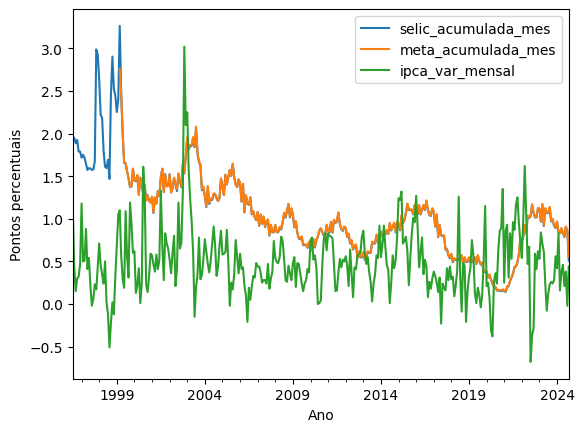

In [108]:
merged_df.plot(y = ['selic_acumulada_mes', 'meta_acumulada_mes', 'ipca_var_mensal'], x = 'periodo_mes')
plt.ylabel('Pontos percentuais')
plt.xlabel('Ano')
plt.show()

Note que não há diferença significativa entre a meta e a selic a não ser que a meta somente foi estabelecida em 1999 e que a maior diferença entre as duas séries foi 0,4 pontos percentuais em suas respectivas versões anualizadas. Além disso, a diferença das versões anualizadas, a partir de 2013, ficou fixa em 0,1. Por conta do exposto e devido a selic_over possuir mais dados, vou somente considerar a selic_acumulada_mes para as análises daqui em diante.

Considerando que temos séries históricas, vamos usar o mês como coluna para observar variações mensais por ano. Façamos isso para selic, para começar.

In [109]:
selic_pivot = merged_df.pivot(index = 'ano', columns = 'mes', values = 'selic_acumulada_mes')
selic_pivot.head()

mes        JAN       FEV       MAR       ABR       MAI       JUN       JUL   
ano                                                                          
1996       NaN       NaN       NaN       NaN       NaN       NaN  1.910962  \
1997  1.717327  1.751689  1.715005  1.646800  1.572943  1.594616  1.591287   
1998  2.634508  2.219176  2.183608  1.791834  1.610061  1.594688  1.690883   
1999  2.253093  2.393768  3.263469  2.465634  1.998573  1.658579  1.647054   
2000  1.446639  1.441297  1.508343  1.285597  1.483384  1.382730  1.300285   

mes        AGO       SET       OUT       NOV       DEZ  
ano                                                     
1996  1.949640  1.887001  1.925769  1.788905  1.789323  
1997  1.573927  1.578428  1.672221  2.987734  2.931297  
1998  1.467612  2.468170  2.903916  2.523477  2.444905  
1999  1.556525  1.476250  1.374247  1.377586  1.587850  
2000  1.395703  1.216596  1.278990  1.212846  1.191530

Qual será o ano em que houve maior variação da selic?

In [110]:
def plot_var_anual(df: pd.DataFrame) -> None:
    '''
    Gráfico de barras da variação entre janeiro e dezembro de uma tabela em formato amplo (wide format), cujos índices são anos e as colunas são meses
    
    Parametros:
    ---
    df: pd.DataFrame
        Dataframe no formato wide
    '''
    plt.figure(figsize = (12, 10))
    ax = df.dropna().apply(lambda x: (x[-1] - x[0]) / x[0] * 100, axis = 1).plot(kind = 'bar')
    ax.axhline(y = 0, linewidth=.5, color='k')
    ax.bar_label(ax.containers[0], fmt=lambda x: round(x), padding = 3, fontsize = 7, weight = 'bold')
    ax.set_ylabel('Pontos Percentuais')
    plt.plot()

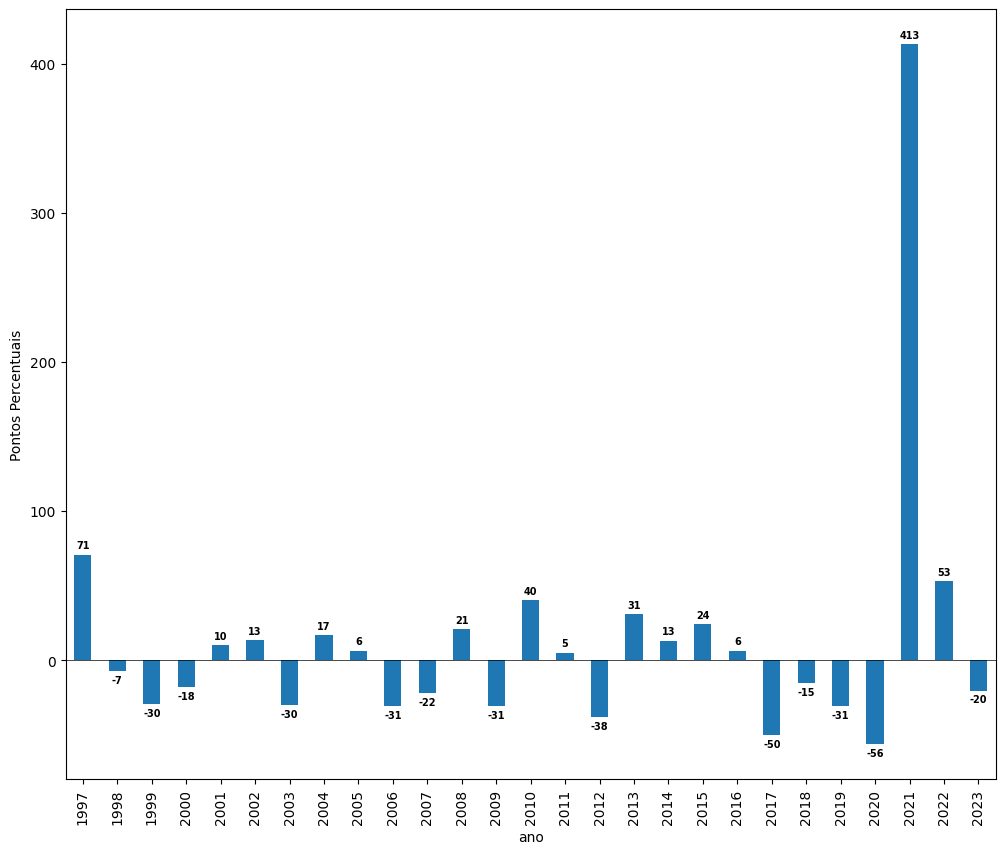

In [111]:
plot_var_anual(selic_pivot)

O ano 2021 apresentou o maior crescimento enquanto no ano de 2020 houve o maior decréscimo. Esses são justamente os dois anos que ficaram marcados pela pandemia do coronavírus. Vamos avaliar melhor como se deu essa variação

<Axes: xlabel='mes'>

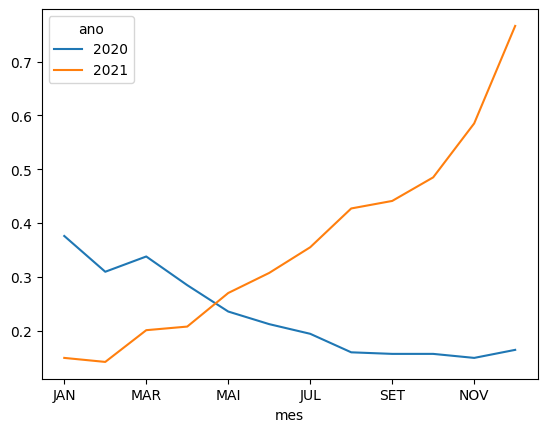

In [112]:
selic_pivot.loc[2020:2021, :].T.plot()

Realmente, enquanto percebemos uma tendência de queda na Selic no ano de 2020, a selic durante o ano de 2021 tem um crescimento vertiginoso. O ano 2020 também foi o ano em que a selic atingiu seu <a href= "https://agenciabrasil.ebc.com.br/economia/noticia/2020-08/copom-reduz-juros-basicos-da-economia-para-2-ao-ano">menor valor na história</a>, isso em meio a pandemia. Já em 2021, foi um ano de muitos reajustes, tendo <a href= "https://agenciabrasil.ebc.com.br/economia/noticia/2021-12/copom-aumenta-taxa-basica-de-juros-para-9-25-ao-ano">ocorrido sete</a>, e como a selic (over) tende a acompanhar a meta, isso é repercutido na primeira.

Quais os anos apresentaram maior volatilidade?

In [113]:
def plot_vol_anual(df: pd.DataFrame):
    '''Gráfico de barras do desvio padrão anual de uma tabela em formato amplo (wide format), cujos índices são anos e as colunas são meses'''
    plt.figure(figsize = (12, 10))
    ax = df.dropna().apply('std', axis = 1).plot(kind = 'bar')
    ax.axhline(y = 0, linewidth=.5, color='k')
    ax.bar_label(ax.containers[0], fmt=lambda x: round(x, 2), padding = 3, fontsize = 7, weight = 'bold')
    ax.set_ylabel('Volatilidade')
    plt.plot()

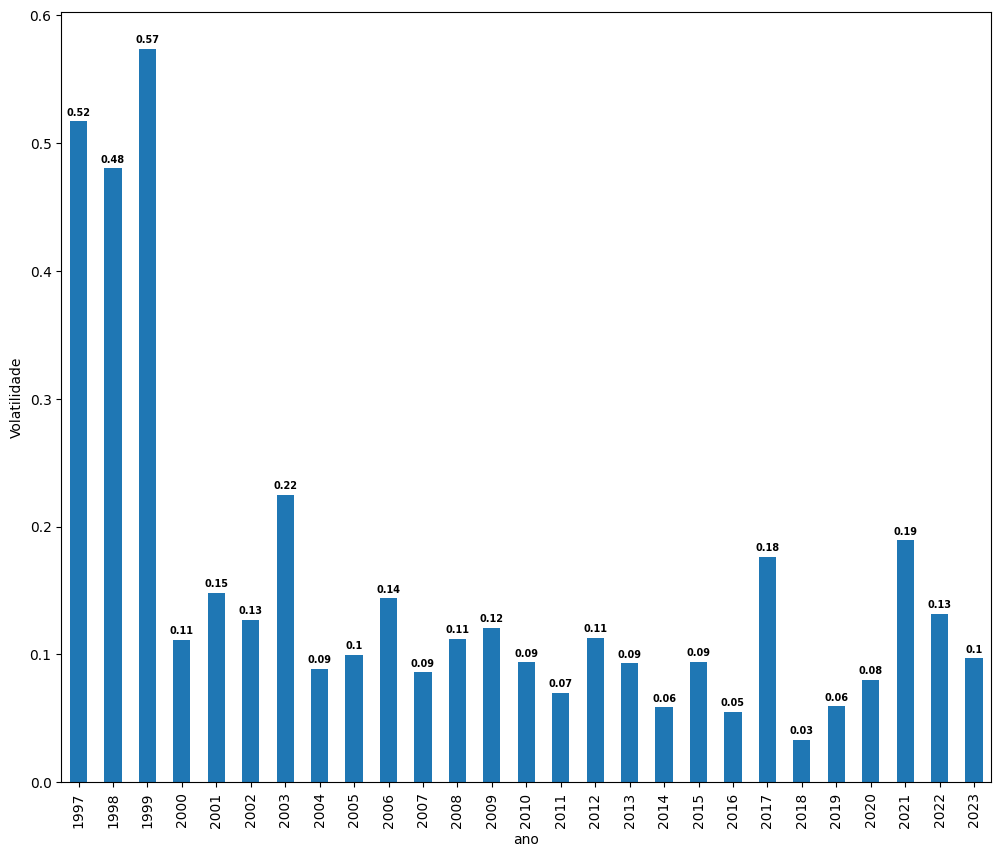

In [114]:
plot_vol_anual(selic_pivot)

O trio 97, 98 e 99 foram anos em que houve maior volatilidade.

Podemos também avaliar ano a ano qual mês teve maior e a menor taxa

[]

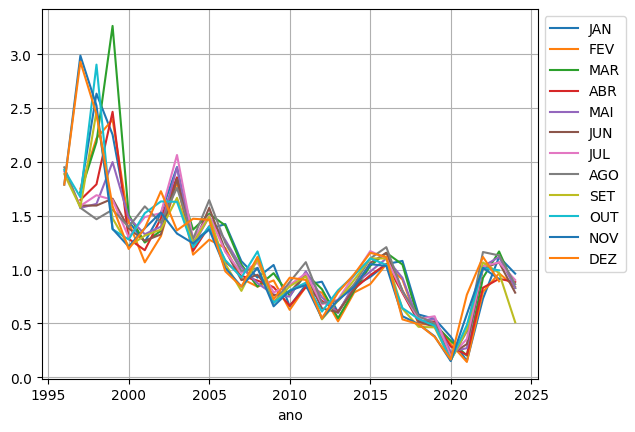

In [115]:
ax = selic_pivot.plot()
ax.legend(bbox_to_anchor=(1, 1))
ax.grid()
plt.plot()

Claramente março apresentou o maior valor da taxa selic e isso ocorreu no ano de 1999. Já o mínimo não é tão claro. Vamos visualizar de outra forma.

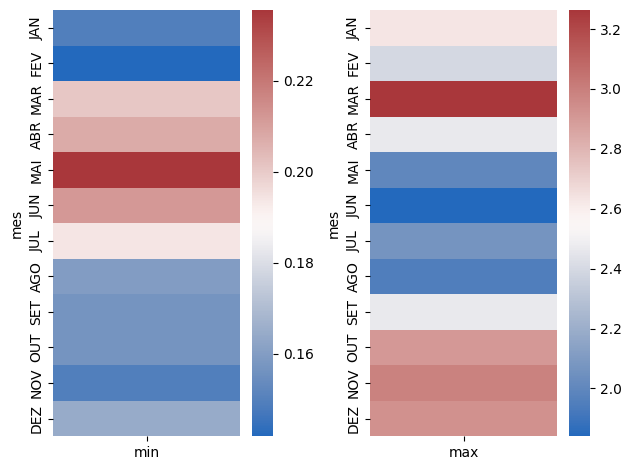

In [116]:
fig, axs = plt.subplots(1, 2)
sns.heatmap(selic_pivot.agg(['min', 'max'],  axis = 0).loc['min', :].to_frame(), cmap = sns.color_palette("vlag", as_cmap=True), ax= axs[0])
sns.heatmap(selic_pivot.agg(['min', 'max'],  axis = 0).loc['max', :].to_frame(), cmap = sns.color_palette("vlag", as_cmap=True), ax= axs[1])
fig.tight_layout()

O mínimo foi em fevereiro de 2021. Aproveitando que temos a colunas decada, podemos agrupar os dados anualmente acumulando-os e agrupando por decada.

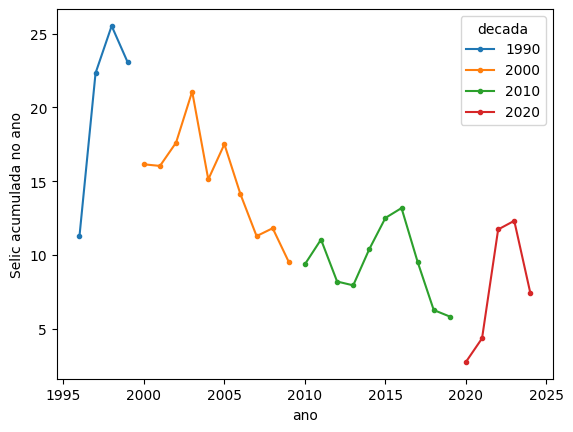

In [117]:
selic_pivot_dec = pd.pivot_table(merged_df, index = 'ano', columns = 'decada', values = 'selic_acumulada_mes', aggfunc = 'sum')
selic_pivot_dec.plot(style='.-')
plt.ylabel('Selic acumulada no ano')
plt.show()

Vemos que a década de 90 tem um forte crescimento na selic, terminando com a maior variação. Já na década de 2000, temos uma tendência de queda dos juros e isso prossegue até a década de 2010. A década de 2020 inicia com os menores juros acumulados da história, e atinge um pico em 2022-23 e mais recentemente apresenta uma forte queda.  
Vamos agora ao IPCA.

In [118]:
ipca_pivot = merged_df.pivot(index = 'ano', columns = 'mes', values = 'ipca_var_mensal')
ipca_pivot.head()

mes    JAN   FEV   MAR   ABR   MAI   JUN   JUL   AGO   SET   OUT   NOV   DEZ
ano                                                                         
1996   NaN   NaN   NaN   NaN   NaN   NaN  1.11  0.44  0.15  0.30  0.32  0.47
1997  1.18  0.50  0.51  0.88  0.41  0.54  0.22 -0.02  0.06  0.23  0.17  0.43
1998  0.71  0.46  0.34  0.24  0.50  0.02 -0.12 -0.51 -0.22  0.02 -0.12  0.33
1999  0.70  1.05  1.10  0.56  0.30  0.19  1.09  0.56  0.31  1.19  0.95  0.60
2000  0.62  0.13  0.22  0.42  0.01  0.23  1.61  1.31  0.23  0.14  0.32  0.59

Qual ano que teve a maior varição do ipca? E a menor? Houve variação negativa?

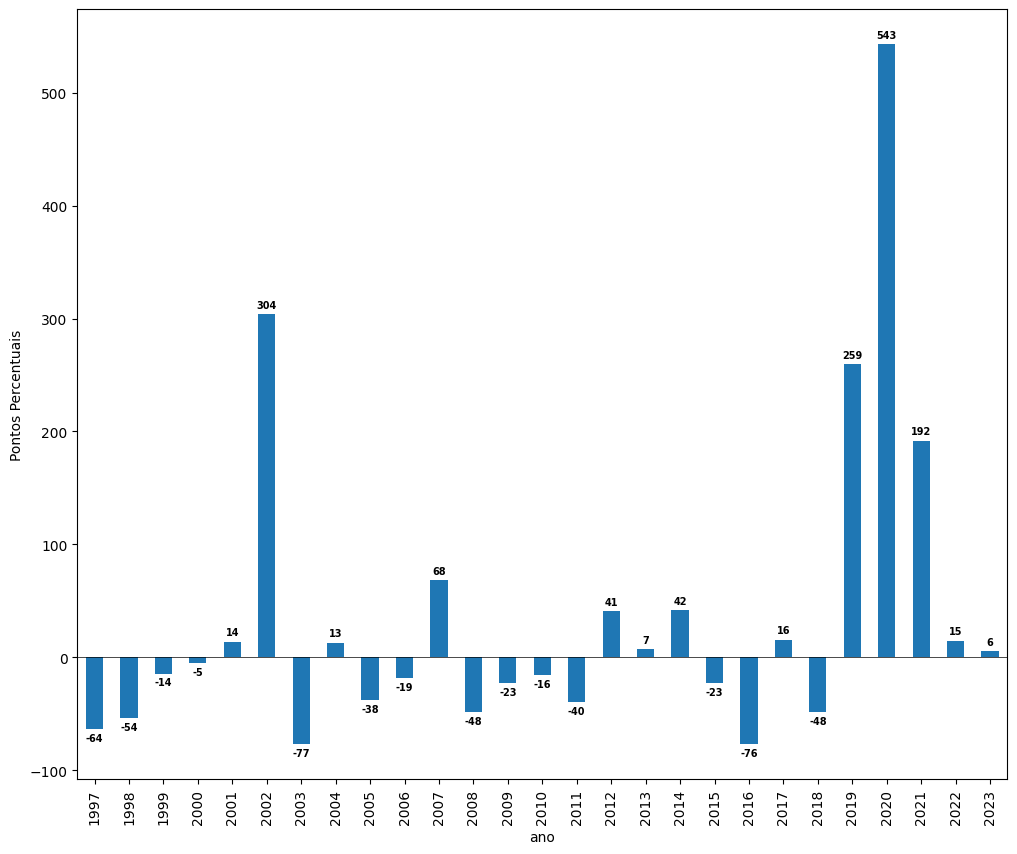

In [119]:
plot_var_anual(ipca_pivot)

A maior variação foi em 2020, que corresponde a um ano antes da maior variação da selic. Isso pode ser tomado como indicativo para subir o ipca de modo a controlar a inflação. O ano de 2003 foi o que teve maior variação negativa, seguido de perto por 2016. O ano que menos variou foi 2000, com uma variação negativa de 5%. Vamos plotar as séries correspondentes aos anos 2020 e 2003.

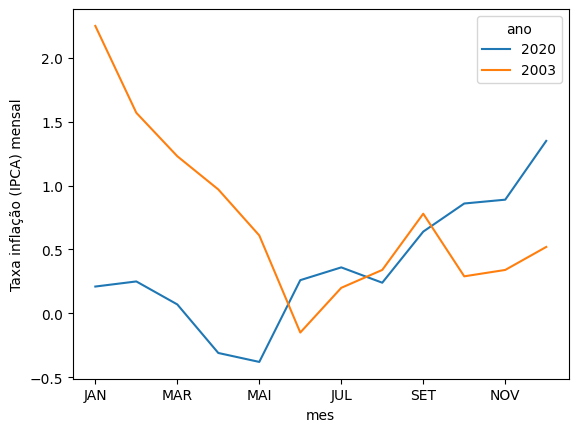

In [120]:
ipca_pivot.loc[[2020, 2003], :].T.plot()
plt.ylabel('Taxa inflação (IPCA) mensal')
plt.show()

O ano 2003 apresentou um rápido decrescimento até junho, onde ficou negativo (deflação) e depois voltou a subir novamente. Segundo <a href = 'https://www1.folha.uol.com.br/fsp/dinheiro/fi1501200406.htm'>Pedro Soares da Folha</a>, o fato de o IPCA esteve alto devido a crise cambial de 2002 provocada pelo temor dos investidores com as eleições. No caso de 2020, há a tendência de crescimento <a href= 'https://g1.globo.com/economia/noticia/2021/01/12/ipca-inflacao-oficial-fecha-2020-em-452percent.ghtml'> devido ao aumento dos preços dos alimentos</a>. Vamos analisar a volatilidade.

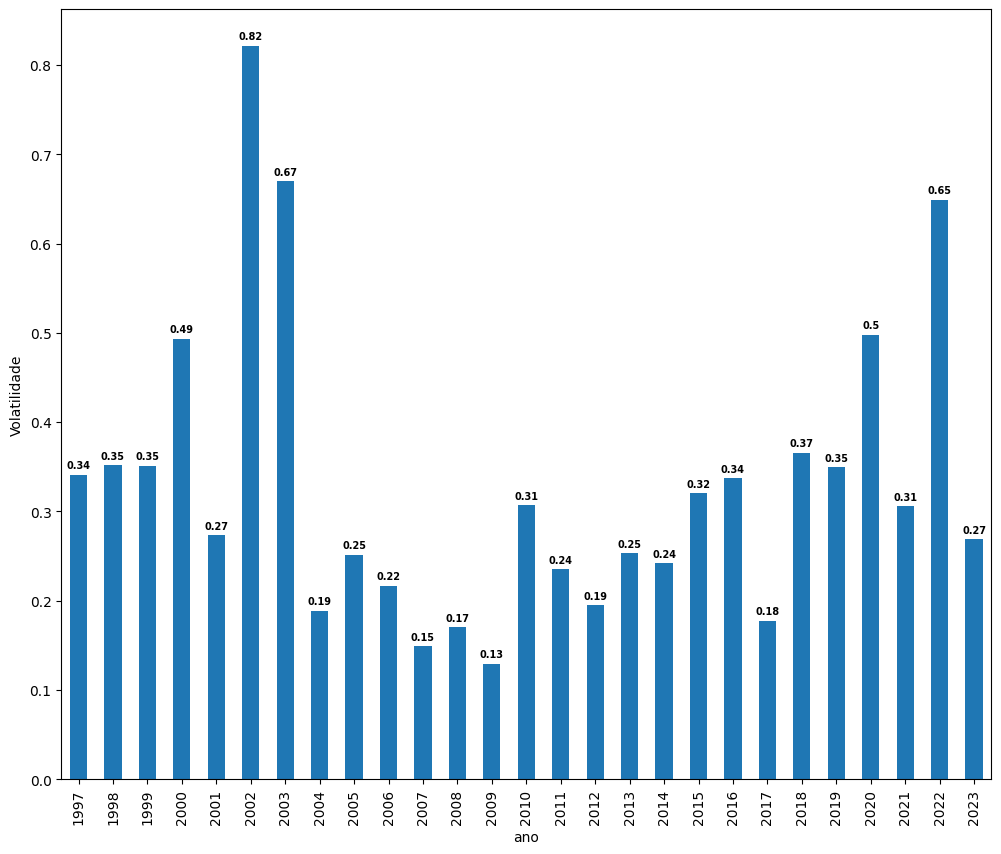

In [121]:
plot_vol_anual(ipca_pivot)

O ano de maior volatilidade no ipca foi 2002, que influenciado pelo aumento do <a href= "https://www1.folha.uol.com.br/fsp/dinheiro/fi1101200314.htm">preço dos alimentos</a> no segundo semestre, atingiu seu pico de 3,02%.

Vamos agora avaliar ano a ano, o comportamento de cada mês

[]

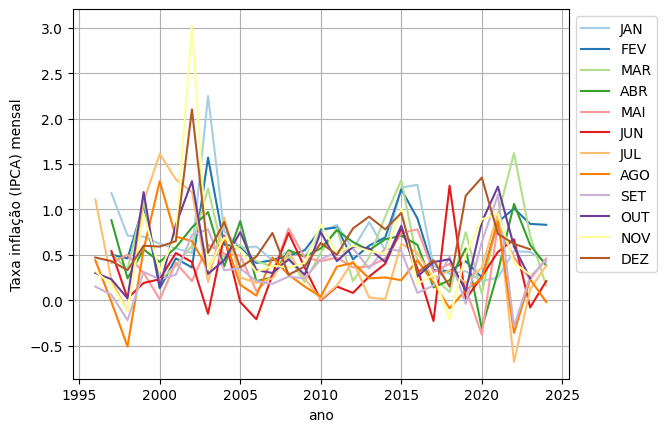

In [122]:
ax = ipca_pivot.plot(color = sns.color_palette('Paired', 12))
ax.set_ylabel('Taxa inflação (IPCA) mensal')
ax.legend(bbox_to_anchor=(1, 1))
ax.grid()
plt.plot()

O valor máximo ocorreu em novembro de 2002 e o mínimo (maior deflação) em julho de 2022.

Como variou o acumulado anual do ipca em cada década?

[]

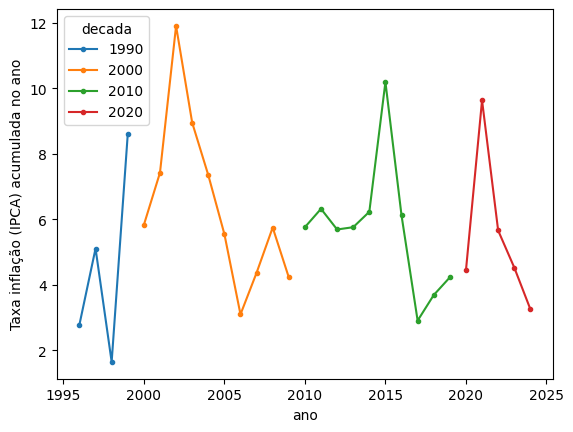

In [123]:
ipca_pivot_dec = pd.pivot_table(merged_df, index = 'ano', columns = 'decada', values = 'ipca_var_mensal', aggfunc = 'sum')
ipca_pivot_dec.plot(style='.-')
plt.ylabel('Taxa inflação (IPCA) acumulada no ano')
plt.plot()

Na década de 90 houve uma grande alta. A década de 2000 começa crescendo até atingir o maior valor de IPCA da história em 2002. Os próximos quatro anos são de queda, mas volta a crescer até 2008. Temos outros picos em 2015 e 2021. Atualmente o ipca acumulado em 12 meses está em queda. Vamos plotar IPCA e Selic juntos.

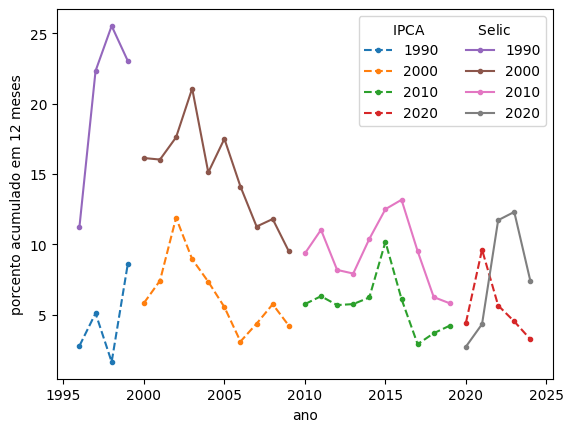

In [124]:
ax = ipca_pivot_dec.plot(style='.--')
selic_pivot_dec.plot(style='.-',ax = ax)
plt.legend(ncol=2, title=r'IPCA$\qquad\qquad$Selic')
plt.ylabel('porcento acumulado em 12 meses')
plt.show()

No gráfico acima, podemos notar que as séries da selic e do ipca, de uma maneira geral, possem algumas similaridades tais como os picos e a tendência. Outro ponto importante é a redução na distância conforme os anos. Ademais, na década de 2020 temos a primeira vez em que ipca fica acima da selic, em pontos percentuais.

Outra possível pergunta que pode surgir é qual foi a maior taxa por mês e em qual ano ela ocorreu? Como temos muitos anos, uma forma mais fácil de visualizar é usando plotly.

In [125]:
merged_df['ano']

typing.Literal[<no_default>]
0      1996
1      1996
2      1996
3      1996
4      1996
       ... 
334    2024
335    2024
336    2024
337    2024
338    2024
Name: ano, Length: 339, dtype: int64

In [126]:
def plot_radar_continuo(df: pd.DataFrame, r: str, theta: str, group: str, period: int) -> None:
    '''Plota timeseries de forma contínua num gráfico tipo radar, !!Os índices tem que ser crescentes como os anos. 
    O dataframe já deve estar ordenado
    
    Parametros:
    df: pd.DataFrame
        Dataframe contendo a serie a ser plotata
    r: str
        Coluna do dataframe contendo os valores
    theta: str
        Coluna do dataframe com os valores que serão os ângulos
    group: str
        Coluna que contém os grupos de r
    period: int
        Periodo de cada grupo'''
    fig = go.Figure()

    df = df[[r, theta, group]]
    groups_list = df[group].unique()
    for i in range(len(groups_list)):
        groups_len = len(df[df[group] == groups_list[i]])
        if groups_len == period:
            group_idxs = df[df[group] == groups_list[i]].index
            df_slice = df.loc[np.r_[group_idxs, group_idxs[-1] + 1], :]
            fig.add_trace(go.Scatterpolar(
                r=df_slice[r],
                theta= df_slice[theta],
                hovertemplate = '<b>' + r +'</b>: %{r:.2f}' +
                    '<br><b>'+ theta +'</b>: %{theta}' 
                    '<br><b>' + group + '</b>: ' + str(groups_list[i]),
                name = str(groups_list[i])
            ))
        else:
            group_idxs = df[df[group] == groups_list[i]].index
            df_slice = df.loc[group_idxs, :]
            fig.add_trace(go.Scatterpolar(
                r=df_slice[r],
                theta= df_slice[theta],
                hovertemplate = '<b>' + r +'</b>: %{r:.2f}' +
                    '<br><b>'+ theta +'</b>: %{theta}' 
                    '<br><b>' + group + '</b>: ' + str(groups_list[i]),
                name = str(groups_list[i])
            ))

    fig.update_layout(
        polar=dict(radialaxis=dict(
            visible=False,
            )
        ),
        showlegend=True,
        legend = dict(
            x=1,
            y=1,
            traceorder="reversed",
            title_font_family="Times New Roman",
            font=dict(
                family="Courier",
                size=13,
                color="black"
            ),
            bgcolor="LightSteelBlue",
            bordercolor="Black",
            borderwidth= 1
        ),
        title = r.replace('_', ' ').title(),
        titlefont={'size': 28, 'family':'Serif', 'color' : 'white'},
        template='plotly_dark',
        paper_bgcolor='steelblue',
        width=600, height=500
    )
    fig.update_traces(mode="lines")
    fig.show()

In [127]:
def plot_radar_interativo(indice):
    plot_radar_continuo(merged_df, indice, 'mes', 'ano', 12)

In [128]:
import os
os.getcwd()

'C:\\Users\\Mailson\\Analise-Dados-Macroeconomicos'

In [129]:
from ipywidgets import interact, interactive, fixed, interact_manual

interact(plot_radar_interativo, indice = {
    'Selic Acumulada no Mês': 'selic_acumulada_mes',
    'IPCA Variação Mensal': 'ipca_var_mensal'}
)

interactive(children=(Dropdown(description='indice', options={'Selic Acumulada no Mês': 'selic_acumulada_mes',…

<function __main__.plot_radar_interativo(indice)>

Para a selic, o ano de 2020 teve os menores valores por mais meses. Os maiores valores foram para anos do final da década de 1990. O ipca teve maiores variações em 2002 e 2003 e possui mínimo em 2022. 

Vamos analisar cada série individualmente, a começar pela selic.

Text(0, 0.5, 'Taxa selic %')

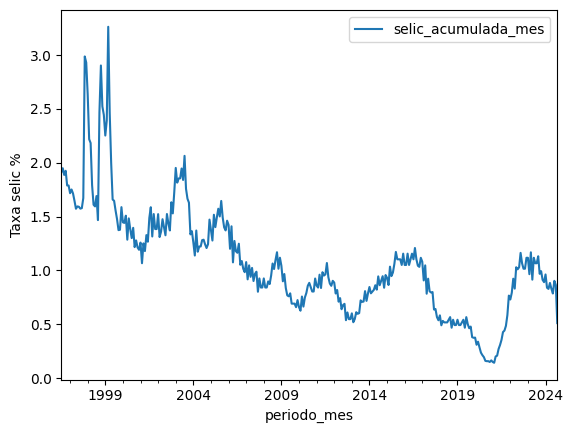

In [130]:
merged_df.plot(x = 'periodo_mes', y = 'selic_acumulada_mes')
plt.ylabel('Taxa selic %')

Em uma primeira análise, percebemos que a série da selic possui uma tendência global de decrescimento, o que já nos diz que ela não é estacionária. Não é possível observar sazonalidade. Além disso, temos uma maior variabilidade da taxa entre 1997-2000. Vamos verificar melhor.

In [131]:
def plot_lowess_trend(x: pd.Series, y: pd.Series, grid: bool | None = None) -> None:
    '''Gráfico com ajuste usando lowess
    Parametros:
    ---
    x: pd.Series
        Variável x
    y: pd.Series
        Variável y
    grid: bool, optional
        Se True, plot com linhas de grade. Caso False, não plota linhas de grade
    '''
    lowess_trend_x, lowess_trend_y = zip(*sm.nonparametric.lowess(exog = x, endog = y))
    lowess_trend_x = pd.to_datetime(lowess_trend_x)
    plt.plot(lowess_trend_x, y, '.', label = 'dados')
    plt.plot(lowess_trend_x, lowess_trend_y, label = 'ajuste')
    if grid:
        plt.grid()
    plt.show()

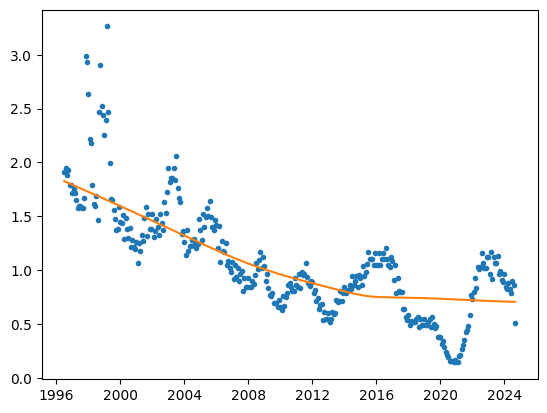

In [132]:
plot_lowess_trend(merged_df['periodo_timeformat'], merged_df['selic_acumulada_mes'])

Do gráfico acima notamos que até 2014 há uma tendência de decrescimento. Após esse período, temos uma tendência aproximadamente constante. Vamos testar a estacionariedade da série.

In [133]:
def teste_adf(ts: pd.Series, reg: str | None = None) -> pd.DataFrame:
    '''Teste Augmented Dickey-Fuller
    
    Parametros:
    ---
    ts: timeseries
        Série a ser testada
    reg: str, optional
        Com tendência ou sem. 

    Retorna:
    ---
    res: pd.DataFrame
        Resultado do teste
    '''
    if reg == 'trend':
        reg = 'ct'
    elif reg == 'quad':
        reg  = 'ctt'
    else:
        reg = 'c'
    adf_res = smt.adfuller(ts, regression = reg)
    res = pd.DataFrame(adf_res[:2], index = ['adf stats', 'pval'], columns = ['adfuller test res'])
    return res


teste_adf(merged_df['selic_acumulada_mes'], 'trend')

adfuller test res
adf stats          -4.713902
pval                0.000661

Para um nível de significância de 5%, nós rejeitamos a hipótese nula e concluímos que a série não tem raiz unitária, ou seja, a série pode ser estacionária. No entanto, a série não possui características de ser estacionária. Será que ela é tendência-estacionária (trend-stationary), ou seja não-estacionária porém sem raiz unitária? Façamos o teste KPSS

In [134]:
def teste_kpss(ts: pd.Series, reg: str | None = None) -> pd.DataFrame:
    '''Teste KPSS

    Parametros:
    ---
    ts: pd.Series
        Série a ser testada
    reg: 
        Com tendência ou sem. 
    
    Retorna:
    ---
    res: pd.DataFrame
        Resultado do teste
    '''
    if reg == 'trend':
        reg = 'ct'
    elif reg == 'constant' or reg is None:
        reg = 'c'
    else:
        print('reg é inválido')
    kpss_res = smt.kpss(ts, regression = reg)
    res = pd.DataFrame(kpss_res[:2], index = ['kpss stats', 'pval'], columns = ['KPSS test res'])
    return res

teste_kpss(merged_df['selic_acumulada_mes'], 'trend')

C:\Users\Mailson\AppData\Local\Temp\ipykernel_15144\1709600699.py:22: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




KPSS test res
kpss stats       0.258015
pval             0.010000

Como o pval é menor que 0,05, há evidência para rejeitarmos que a série é tendência-estacionária (trend-stationary) em favor da hipótese alternativa de que a série possui raiz unitária. Portanto, temos dois testes com resultados conflitantes, logo a estacionariedade é inconclusiva. Vamos ver se a série é diferenciada-estácionária (difference-stationary), isto é, a tendência média é estocástica (<a href= "https://www.mathworks.com/help/econ/trend-stationary-vs-difference-stationary.html">ref.<a>).

In [135]:
merged_df = merged_df.set_index('periodo_mes')

<Axes: xlabel='periodo_mes'>

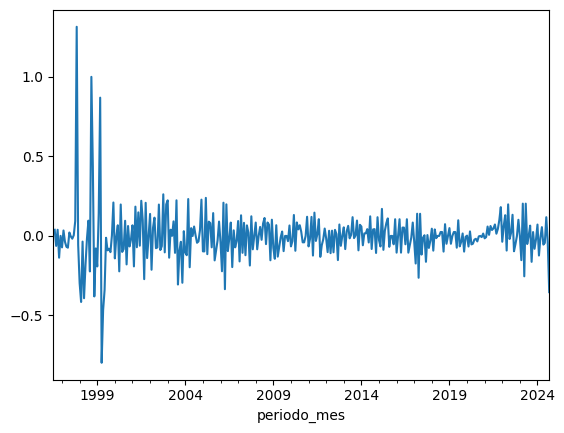

In [136]:
selic_dif = merged_df['selic_acumulada_mes'].diff()
selic_dif.plot()

Vamos aos testes

In [137]:
teste_adf(selic_dif[1:])

adfuller test res
adf stats          -4.620858
pval                0.000118

In [138]:
teste_kpss(selic_dif[1:])

C:\Users\Mailson\AppData\Local\Temp\ipykernel_15144\1709600699.py:22: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




KPSS test res
kpss stats       0.022999
pval             0.100000

Concluímos, para um nível de significância de 5%, que a série diferenciada é estacionária. Então a série histórica Selic acumulada mensal é uma série diferenciada-estacionária (difference-stationary). Perceba que diferenciando a série, eliminamos a tendência que ela tinha.

No caso da sazonalidade, para estudar melhor, vamos plotar um gráfico de violinos

<Axes: xlabel='mes', ylabel='selic_acumulada_mes'>

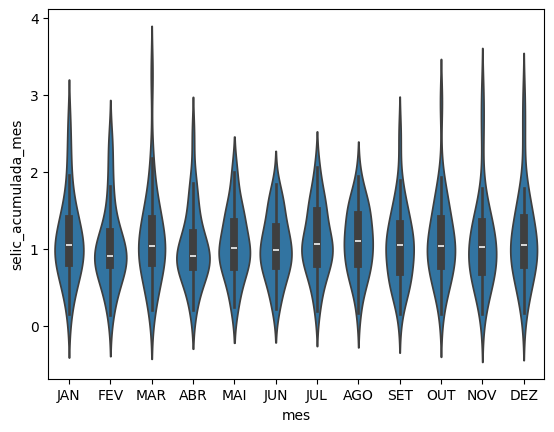

In [139]:
sns.violinplot(data = merged_df, x = 'mes', y = 'selic_acumulada_mes')

Talvez a sazonalidade seja melhor perceptível na série sem tendência.

<Axes: xlabel='mes', ylabel='selic_dif'>

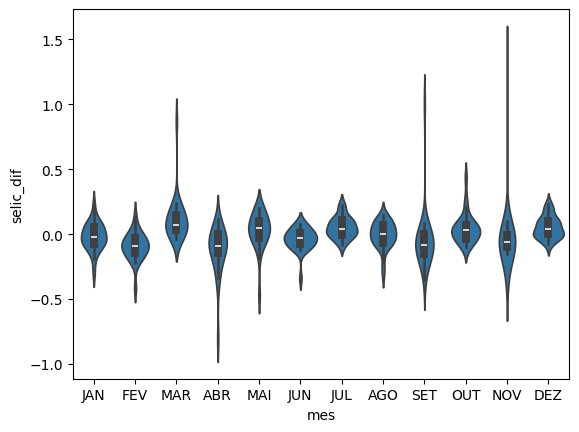

In [140]:
merged_df['selic_dif'] = selic_dif
sns.violinplot(data = merged_df, x = 'mes', y = 'selic_dif')

Nenhuma sazonalidade é perceptível. Podemos decompor a série para analisar melhor e como temos uma tendência perceptível, vamos usar decomposição de tendência-sazonalidade com loess.

In [141]:
def stl_decomp_plot(data: pd.Series, period: int) -> None:
    '''Plota a decomposição da série temporal em tendência, sazonalidade e resíduos

    Parametros:
    ---
    data: pd.Serie
        Série a ser decomposta
    period: it
        período de sazonalidade
    '''
    
    data_decomp = smt.STL(data, period = period).fit()

    fig, axs = plt.subplots(4, 1, sharex=True)

    axs[0].plot(data_decomp.observed)
    axs[0].set_ylabel('Série')
    
    axs[1].plot(data_decomp.trend)
    axs[1].set_ylabel('Tendência')
    
    axs[2].plot(data_decomp.seasonal)
    axs[2].set_ylabel('Sazonalidade')
    
    axs[3].plot(data_decomp.resid)
    axs[3].set_ylabel('Resíduos')

    plt.show()

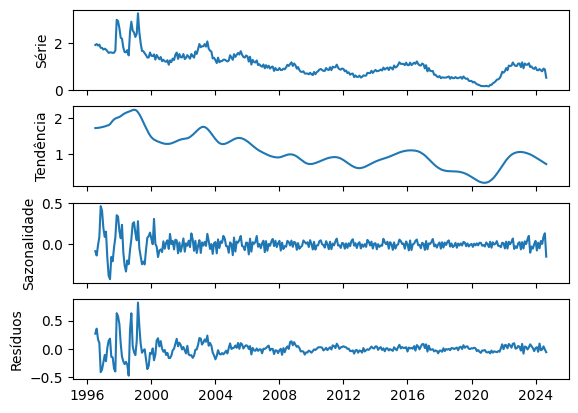

In [142]:
stl_decomp_plot(merged_df[['selic_acumulada_mes', 'periodo_timeformat']].set_index('periodo_timeformat'), 12)

Concluímos que não temos sazonalidade. O que temos são alguns ciclos.

Vamos plotar a função de autocorrelação (ACF) para a selic.

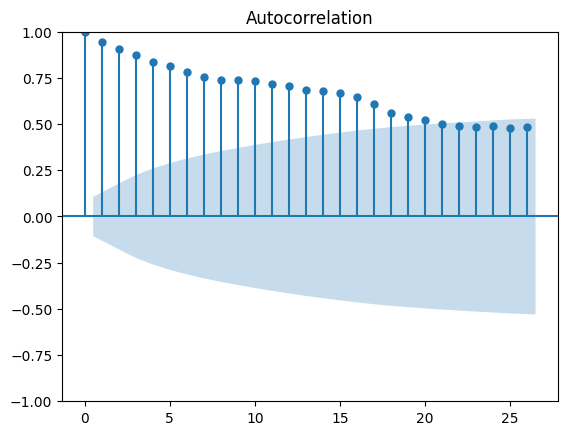

In [143]:
smg.tsa.plot_acf(merged_df['selic_acumulada_mes']);

Podemos perceber que o gráfico do ACF apresenta um padrão de série não estacionária. 

Podemos também verificar que a série histórica da selic exibe maior volatilidade no final da década de 90 e início dos anos 2000, como é possível ver no gráfico abaixo

<Axes: xlabel='periodo_mes'>

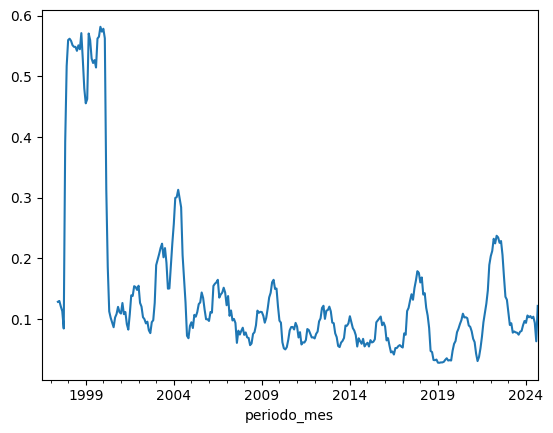

In [144]:
merged_df['selic_acumulada_mes'].rolling(12).std().plot()

Por fim, vamos plotar a distribuição

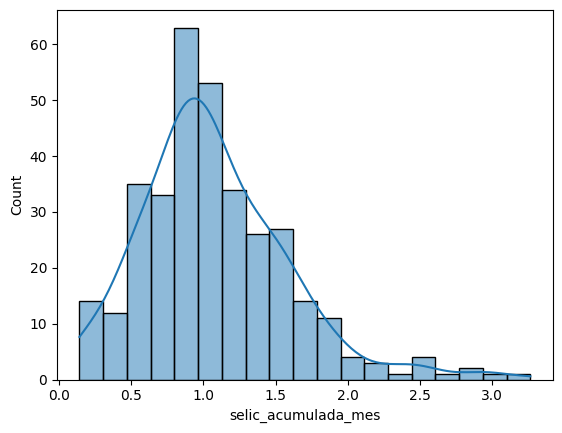

In [145]:
ax = sns.histplot(merged_df['selic_acumulada_mes'], kde = True)

Claramente não é normal, além disso, temos uma assimetria positiva, devido aos valores da taxa alcançados no final da década de 90 e início da década de 2000.

In [146]:
merged_df['selic_acumulada_mes'].describe().to_frame('Stats')

Stats
count  339.000000
mean     1.076964
std      0.512398
min      0.141915
25%      0.775896
50%      1.015478
75%      1.371443
max      3.263469

Apesar disso, média não difere tanto da mediana. Vamos plotar o gráfico quantil-quantil

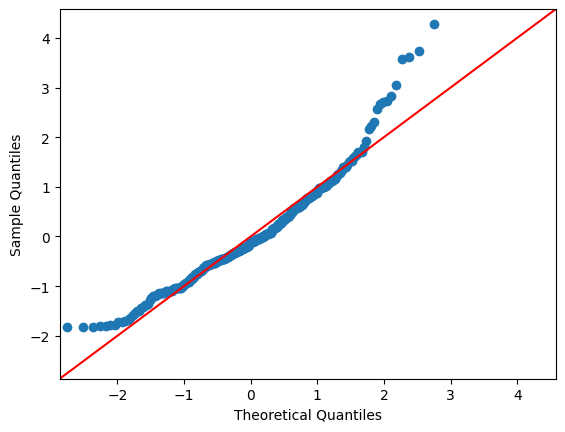

In [147]:
sm.qqplot(merged_df['selic_acumulada_mes'], fit=True, line="45")
plt.show()

Confirmando que não temos uma distribuição normal. As duas pontas tendem a se distanciar da reta em vermelho.

Agora é a vez do IPCA.

<Axes: xlabel='periodo_mes'>

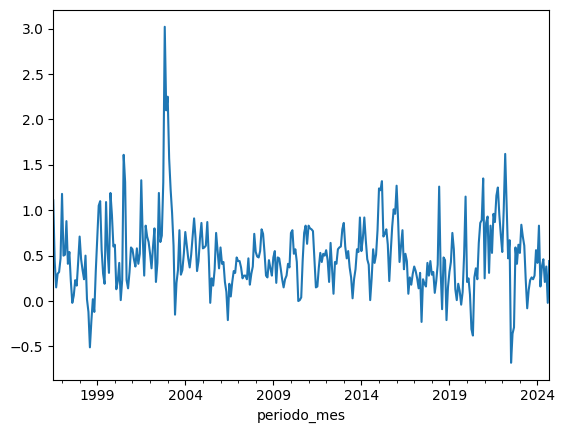

In [148]:
merged_df['ipca_var_mensal'].plot()

A série histórica da variação mensal do IPCA aparenta ter média constante, não parece haver sazonalidade e a série exibe maior variação entre 2003 e 2004. Vamos verificar

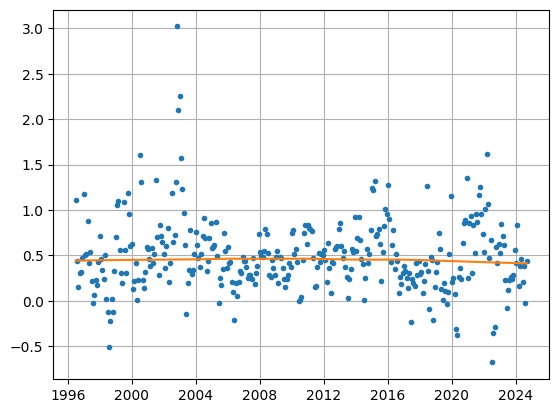

In [149]:
plot_lowess_trend(merged_df['periodo_timeformat'] ,merged_df['ipca_var_mensal'], grid = True)

Realmente, a série parece ter uma média constante que independe de t. Checamos se ela é estacionária via teste estatístico

In [150]:
teste_adf(merged_df['ipca_var_mensal'])

adfuller test res
adf stats      -9.089900e+00
pval            3.849460e-15

Rejeitamos a hipótese dela ter raiz unitária, para um nível de significância de 5%. Façamos o teste KPSS só para confirmar

In [151]:
teste_kpss(merged_df['ipca_var_mensal'])

C:\Users\Mailson\AppData\Local\Temp\ipykernel_15144\1709600699.py:22: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




KPSS test res
kpss stats        0.12799
pval              0.10000

Não rejeitamos a hipótese da série ser estacionária. Concluimos com os dois testes que a série é estacionária. Analisamos, agora, a sazonalidade.

<Axes: xlabel='mes', ylabel='ipca_var_mensal'>

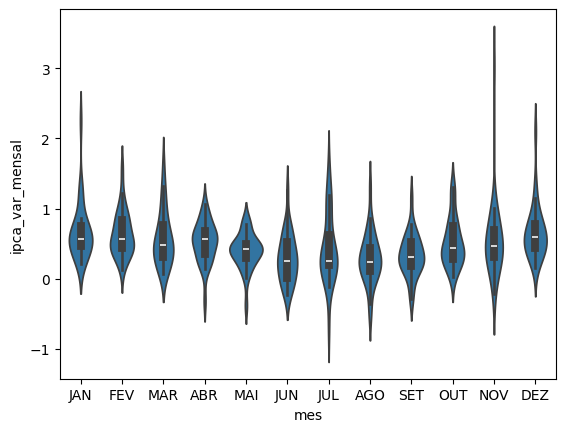

In [152]:
sns.violinplot(merged_df, x = 'mes', y = 'ipca_var_mensal')

Pelo gráfico acima, a série não exibe sazonalidade forte. Vamos decompor.

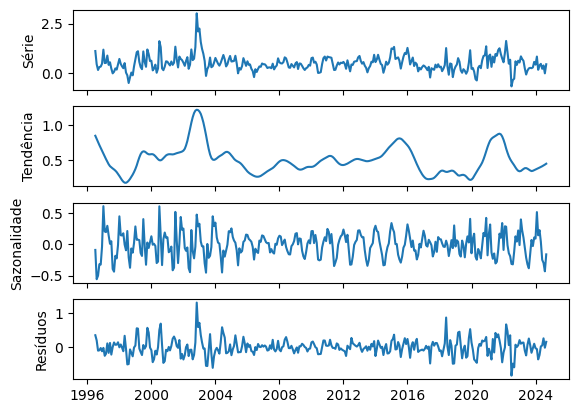

In [153]:
stl_decomp_plot(merged_df[['ipca_var_mensal', 'periodo_timeformat']].set_index('periodo_timeformat'), 12)

O IPCA não exibe sazonalidade. Plotamos agora o ACF e PACF

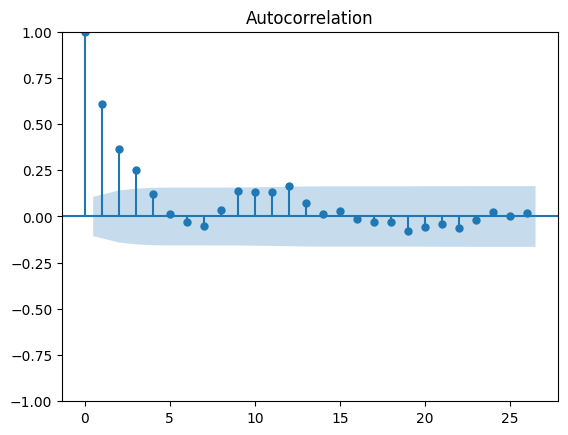

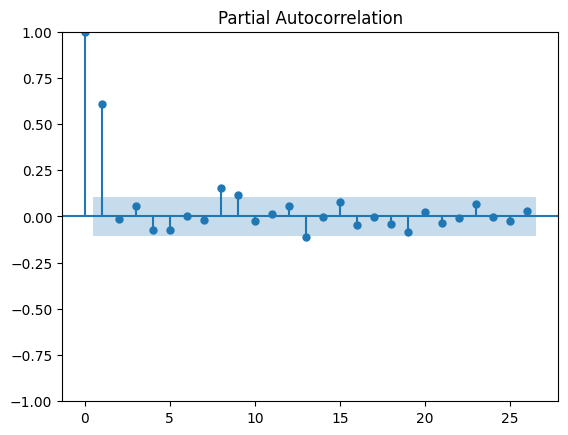

In [154]:
smg.tsa.plot_acf(merged_df['ipca_var_mensal']);
smg.tsa.plot_pacf(merged_df['ipca_var_mensal']);

Usando os dois gráficos, o ipca pode ser descrito, pelo método de Box-Jenkins,  por um processo: AR(1) ou ARMA(1, 1).

Checamos como se comporta o desvio padrão numa janela de 12 meses

<Axes: xlabel='periodo_mes'>

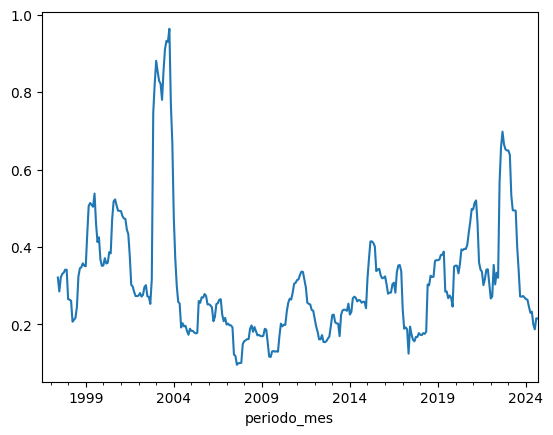

In [155]:
merged_df['ipca_var_mensal'].rolling(12).std().plot()

O maior pico que observamos é entre 2003 e 2004. 

Com base nos dados obtidos e em toda a informação coletada eu me pergunto se mudanças na selic têm efeito na inflação, nesse caso, na variação mensal do IPCA? Para responder vamos visualizar um gráfico de dispersão

<Axes: xlabel='selic_acumulada_mes', ylabel='ipca_var_mensal'>

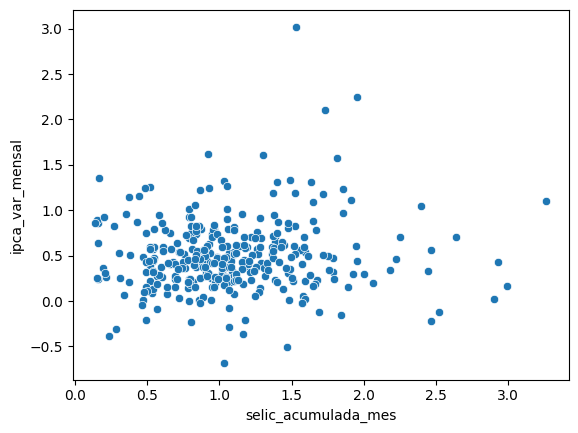

In [156]:
sns.scatterplot(merged_df, y = 'ipca_var_mensal', x = 'selic_acumulada_mes')

Vamos ver se há correlação

In [157]:
def plot_scatter(x: np.array, y: np.array, reg : bool | None = None, order: int | None = None) -> None:
    '''Plota um gráfico de dispersão com valor de correlação

    Parametros
    ---
    x: np.array
        X
    y: np.array
        Y
    reg: bool, optional
        Plota regressão
    order: bool, optional
        Ordem da regressão
    '''
    
    fig, ax = plt.subplots()

    if reg:
        if order is None:
            order = 1
        sns.regplot(x = x, y = y, order = order, ax = ax, line_kws={"color": "C1"})
    else:
        ax.scatter(x, y)

    data_vals = pd.DataFrame(np.c_[x, y], columns = ['x', 'y']).dropna()
    corr, pval = stats.pearsonr(data_vals['x'], data_vals['y'])
    ax.set_title('corr = {:.2f}  pval = {:.2e}'.format(corr, pval))
    plt.show()

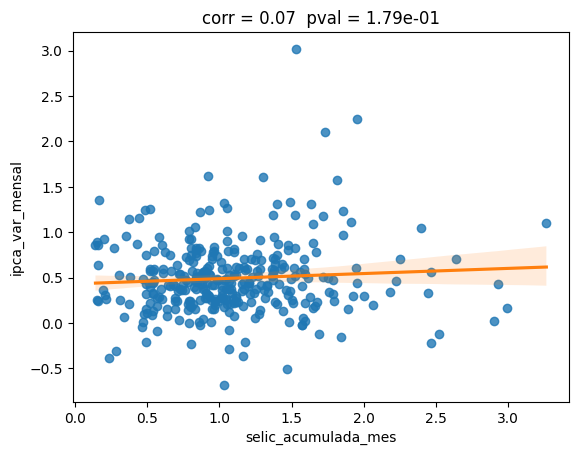

In [158]:
plot_scatter(merged_df['selic_acumulada_mes'], merged_df['ipca_var_mensal'], reg = True)

Temos uma associação linear muito fraca, porém positiva. Podemos checar o gráfico da função de correlação cruzada para observar se 

In [159]:
def plot_ccf(ts1: np.array, ts2: np.array, lags: int | None = None, grid: bool | None = None) -> None:
    '''Gráfico da função de correlação cruzada entre duas séries históricas
    
    Parametros:
    ---
    ts1: np.array
        Série temporal 1
    ts2: np.array
        Série temporal 2
    lags: int, optional
        Quantos lags plotar
    grid: bool, optional
        Caso True, plot linha de grade
    '''
    if not lags:
        lags = 25
    backwards = smt.ccf(ts1[::-1], ts2[::-1], nlags = lags, adjusted=False)[::-1]
    forwards = smt.ccf(ts1, ts2, nlags = lags, adjusted=False)
    ccf_output = np.r_[backwards[-lags:], forwards[1:lags]]
    x_range = range(-len(ccf_output)//2 + 1, len(ccf_output)//2 + 1)
    
    plt.stem(x_range,  ccf_output)
    plt.xlabel('Lag')
    plt.ylabel('ACF')
    
    conf_int_inf, conf_int_sup = -1.96/np.sqrt(len(ts1)), 1.96/np.sqrt(len(ts2))
    plt.fill_between(x_range, conf_int_inf, conf_int_sup, alpha=0.2)

    if grid:
        plt.grid()
    plt.show()

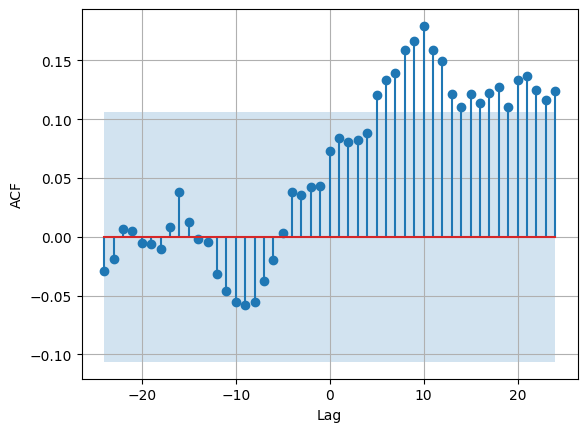

In [160]:
plot_ccf(merged_df['selic_acumulada_mes'], merged_df['ipca_var_mensal'], grid = True)

Temos um pico no lag 10, indicando que o ipca em t tem maior correlação com a selic em t + 10. Dados que cada lag corresponde a um mês, então podemos dizer que a selic está defasada em 10 meses do ipca. Note ainda que apesar da correlação ser estatisticamente significante, ela ainda é baixa.

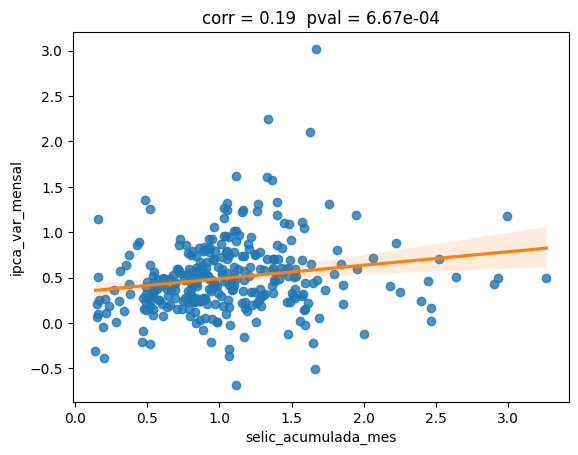

In [161]:
plot_scatter(merged_df['selic_acumulada_mes'].shift(-10), merged_df['ipca_var_mensal'], reg = True)